<a href="https://colab.research.google.com/github/StefaniaRojas/Mineria-de-datos/blob/main/Temp_Entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color= blue> <b> Análisis Descriptivo y Modelamiento de Series de Tiempo </b> </i> <font> 

###### **Presentado por:**
> Laura Carolina Rincón Ochoa\
  Stefanía Rojas García

Para el análisis y modelamiento de las series de tiempo, se utilizaron datos diarios de la temperatura en Bogotá desde el 01 de enero del 2017 hasta el 31 de diciembre del 2021 y datos mensuales de Pasajeros en Colombia desde el año 2004 hasta el año 2015, que contemplan todos los vuelos que tuvieron pasajeros en esos años.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### <font color= 199EDC> <b> Librerías </b> </font>

In [3]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 21.0 MB/s 
     |████████████████████████████████| 9.9 MB 55.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [4]:
pip install ax-platform

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 30.1 MB/s 
     |████████████████████████████████| 403 kB 65.1 MB/s 
     |████████████████████████████████| 727 kB 55.7 MB/s 
     |████████████████████████████████| 245 kB 64.2 MB/s 
     |████████████████████████████████| 145 kB 31.6 MB/s 


In [5]:
pip install SQLAlchemy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 25.4 MB/s 
     |████████████████████████████████| 1.6 MB 52.3 MB/s 


In [7]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import seaborn as sns
import matplotlib as mpl
import io, requests
import sqlalchemy
import random
import plotly.express as px
import tensorflow as tf
import matplotlib.pylab as plt
from tensorflow import keras
import statsmodels as sm
import statsmodels.api as smapi
import pmdarima as pm
from tensorflow.keras import layers
import math
from pandas import read_csv
from matplotlib import pyplot
import matplotlib.pylab as plt
import sklearn
from matplotlib import pyplot
from matplotlib.pyplot import figure
from matplotlib.pylab import rcParams
from sqlalchemy import create_engine
from sklearn.impute import KNNImputer
from statsmodels.tsa.api import STLForecast
from pandas.plotting import scatter_matrix
import tensorflow.keras as keras
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from pmdarima.arima import auto_arima
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import pacf
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping
from sklearn.tree import DecisionTreeRegressor
from statsmodels.graphics.tsaplots import month_plot,quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.arima_model import ARIMA
from tensorflow import keras
import keras_tuner as kt
from tensorflow.keras import layers
from ax.service.ax_client import AxClient
from ax.utils.notebook.plotting import render, init_notebook_plotting

In [8]:
import rpy2.robjects as r
%reload_ext rpy2.ipython

### <font color= F30720> <b> <i> Temperatura diaria registrada en Bogotá entre 2017 y 2021 </i> </b> </font>
Esta serie fue extraída de la base de datos del IDEAM, se tuvieron en cuenta los promedios diarios de las temperaturas en grados centigrados (°C) registradas en Bogotá en las diferentes estaciones meteorológicas que recolectaron información de esos días.
La serie de tiempo cuenta con un total de 1826 registros, de los cuales 13 (0.7%) fueron imputados puesto que no se presentaba la información necesaria. Esta imputación fue realizada a partir del método de vecinos más cercanos (KNN).

#### <font color= 199EDC> <b> Importación e imputación de datos  </b> </font>
Para poder trabajar con esta serie se omitió el día 29 de febrero del 2020.



In [9]:
Temp = pd.read_csv("/content/drive/Shareddrives/Series/Temperatura1.csv", sep=';', header=0, decimal = ',')
Fecha = pd.date_range(start='2017-01-01', end='2021-12-31', freq='D')
Temp['Fecha'] = Fecha
Temp = Temp.set_index('Fecha')
Temp.drop(index='2020-02-29',axis=0,inplace=True)

print(type(Temp))
print(Temp[pd.isnull(Temp.ValorObservado)])
print('En total hay' ,
      str(Temp['ValorObservado'].isnull().sum()) ,
      'valores sin información')

<class 'pandas.core.frame.DataFrame'>
            ValorObservado
Fecha                     
2017-08-12             NaN
2017-12-24             NaN
2019-09-15             NaN
2019-09-16             NaN
2019-09-17             NaN
2020-11-12             NaN
2021-01-05             NaN
2021-01-06             NaN
2021-01-07             NaN
2021-01-08             NaN
2021-08-18             NaN
2021-08-20             NaN
2021-12-05             NaN
En total hay 13 valores sin información


In [10]:
#Imputación de Valores usando el vecino más cercano
imput = KNNImputer(n_neighbors=5, weights="uniform")

# Ajustamos el modelo e imputamos los missing values
imput.fit(Temp[['ValorObservado']])
Temp['ValorObservado'] = imput.transform(Temp[['ValorObservado']]).ravel()
print()
print("Valores pérdidos en ValorObservado: " , 
      str(Temp['ValorObservado'].isnull().sum()))

KNNImputer()


Valores pérdidos en ValorObservado:  0


In [11]:
Tempst=Temp['ValorObservado']
print(type(Tempst))
print(Tempst.head())

<class 'pandas.core.series.Series'>
Fecha
2017-01-01    11.880556
2017-01-02    12.104167
2017-01-03    12.177778
2017-01-04    12.683908
2017-01-05    12.130208
Name: ValorObservado, dtype: float64


Text(0.5, 0, 'Fecha')

Text(0, 0.5, 'Temperatura promedio')

Text(0.5, 1.0, 'Serie de la Temperatura diaria registrada en Bogotá')

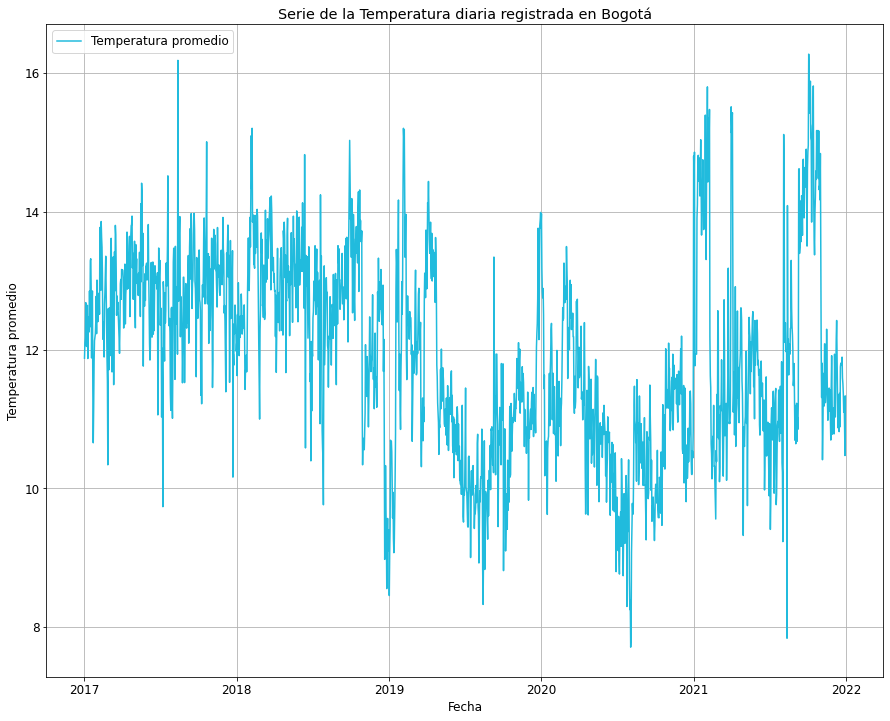

In [12]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(15,12))

ax.plot(Tempst, color='#21BBDD', label='Temperatura promedio')
ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura promedio')
ax.set_title('Serie de la Temperatura diaria registrada en Bogotá')
ax.grid(True)
ax.legend(loc='upper left')

La serie parece ser estacionaria, no presentar tendencia y tener varianza marginal constante, además presenta un cambio a inicios del 2019 que puede ser debido al fénomeno del niño.

Se trabajará con la serie sin transformar. Existe una correlación positiva entre los retardos y el cambio de temperatura promedio. De igual manera se tiene que posiblemente varias correlaciones sean lineales. Se evidenció un decaimiento lento en el ACF lo cual puede indicar presencia de tendencia, además se puede observar un comportamiento a través del tiempo en el gráfico de autocorrelación parcial. Se presentan raices unitarias por lo que se diferenció la serie. Y finalmente, se tiene una estacionalidad anual.

#### <font color= 199EDC> <b> Ajustes del modelo </b> </font>
Para el ajuste de los modelos se usan el 70% de datos como conjunto de entrenamiento, el 20% como conjunto de validación y el 10% restante como conjunto de prueba.

In [13]:
n = len(Tempst)
train = Tempst[0:int(n*0.9)]
train_df = Tempst[0:int(n*0.7)]
val_df = Tempst[int(n*0.7):int(n*0.9)]
test_df = Tempst[int(n*0.9):] 

### <font color= 199EDC> <b> Modelo ARIMA con Fourier </b> </font>



#### <font color= 199EDC> <b> Raices unitarias </b> </font>

In [14]:
adfstat, pvalue, critvalues, resstore=adfuller(Tempst,regression="n",maxlag=365,store=True,regresults=True)
print(resstore.resols.summary())

resultadoadf=adfuller(Tempst,regression="nc", maxlag=9)
print('ADF Statistic: %f' % resultadoadf[0])
print('P-value: %f' % resultadoadf[1])
for key, value in resultadoadf[4].items():
    print('\t%s: %.3f' % (key, value))

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.125
Model:                            OLS   Adj. R-squared (uncentered):              0.121
Method:                 Least Squares   F-statistic:                              28.68
Date:                Thu, 01 Dec 2022   Prob (F-statistic):                    5.46e-47
Time:                        15:41:10   Log-Likelihood:                         -1869.5
No. Observations:                1816   AIC:                                      3757.
Df Residuals:                    1807   BIC:                                      3807.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:821: FutureWarning:

trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.



Al obtener un p-valor de 0.457838, se tiene que la serie presenta raices unitarias. Por lo que se decide diferenciarla.

#### <font color= 199EDC> <b> Serie Diferenciada</b> </font>


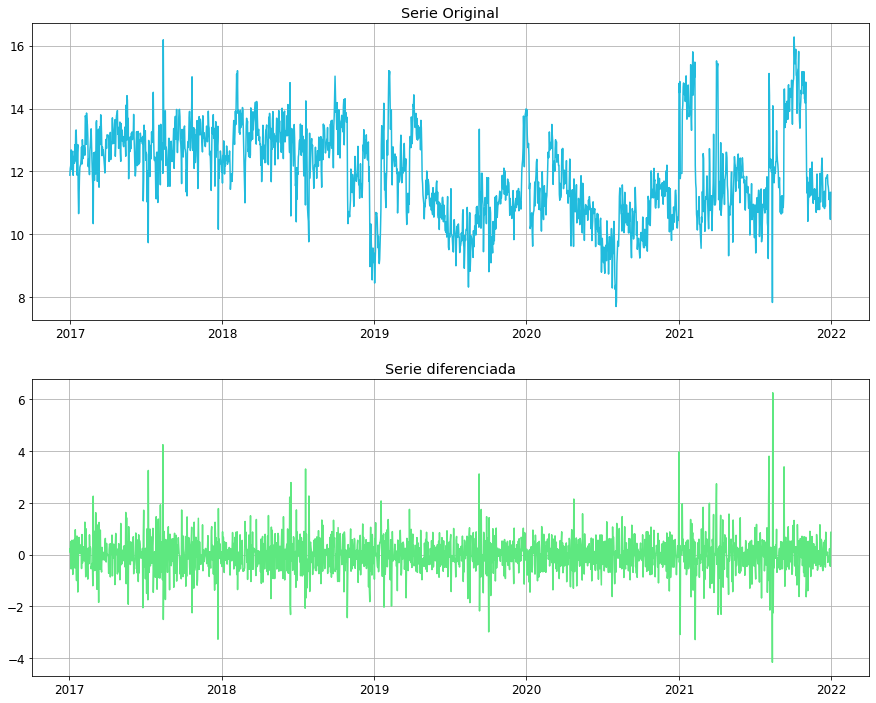

In [15]:
dtempst=Tempst.diff(periods=1)

InteractiveShell.ast_node_interactivity = "last"
plt.rc('font', size=12)
fig, axes = plt.subplots(2,1,figsize=(15,12)) 
axes[0].plot(Temp['ValorObservado'], color='#21BBDD', label='Temperatura promedio')
axes[0].title.set_text('Serie Original')
axes[0].grid(True)
axes[1].plot(dtempst, color='#5EE880')
axes[1].title.set_text('Serie diferenciada')
axes[1].grid(True)
plt.show()

La serie parece ser estacionaria. Pero de igual manera se puede verificar.

#### <font color= 199EDC> <b> Raices Unitarias Estacionales </b> </font>

In [16]:
pm.arima.nsdiffs(dtempst.dropna(), 12 , max_D=2, test='ocsb')

0

#### <font color =199EDC> <b> Gráficos de Autocorrelación </b> </font>
Se realiza un gráfico de autocorrelaciones simples y uno de autocorrelaciones parciales para la serie de temperatura. Esto permitirá observar cuantos retardos son significativos.

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



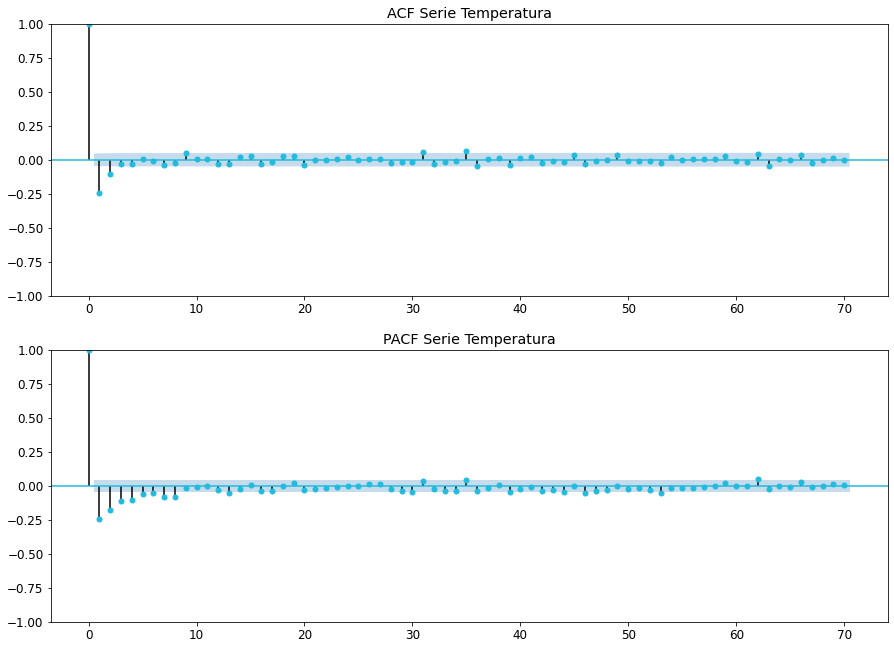

In [17]:
InteractiveShell.ast_node_interactivity = "last"
fig, axes = plt.subplots(2,1,figsize=(15,11)) 
a=plot_acf(dtempst.dropna(),adjusted=False,lags=70,title='ACF Serie Temperatura',ax=axes[0], color = '#21BBDD' )
c=plot_pacf(dtempst.dropna(),lags=70,title='PACF Serie Temperatura',ax=axes[1], color ='#21BBDD')
plt.show()
InteractiveShell.ast_node_interactivity = "all"

#### <font color =199EDC> <b> Fourier </b> </font>

**Periodograma**

<Figure size 1008x576 with 0 Axes>

Text(0.5, 1.0, 'Periodograma')

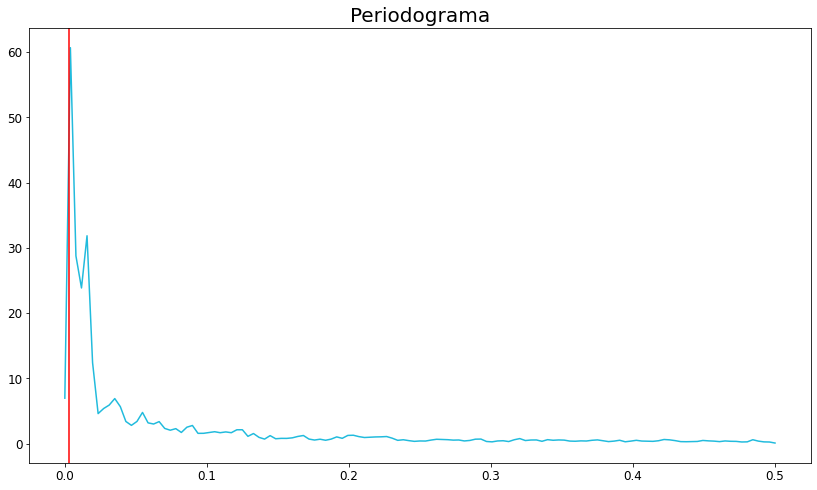

In [18]:
f, Pxx_den=sp.signal.periodogram(Tempst) 
print()
max_index_value = np.argmax(Pxx_den, axis=0)
frecuencia_max=f[max_index_value]
plt.figure(figsize=(14, 8))
f_welch, Pxx_den_welch=sp.signal.welch(Tempst)
plt.plot(f_welch, Pxx_den_welch, color='#21BBDD') 
plt.axvline(x=1/365,color='red')
plt.title('Periodograma', fontdict={'fontsize': 20})

**Boxplot por mes**

In [19]:
f = {'ValorObservado': Tempst.values, 'fecha': Tempst.index,'año':Tempst.index.year,
     'mes':Tempst.index.month_name(), 'dia':Tempst.index.day}
df_temp = pd.DataFrame(data=f)

Se puede observar un ciclo anual, debido a que los valores medios de la temperatura son parecidos entre si pero distintos a los demás.

In [20]:
timestamp_s = range(1825)
year = 1/frecuencia_max
mes = year/12
dia = year/365

Temp['Dia sin'] = np.sin(timestamp_s * (2 * np.pi / dia))
Temp['Dia cos'] = np.cos(timestamp_s * (2 * np.pi / dia))
Temp['Mes sin'] = np.sin(timestamp_s * (2 * np.pi / mes))
Temp['Mes cos'] = np.cos(timestamp_s * (2 * np.pi / mes))
Temp['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
Temp['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

In [21]:
xreg=np.array(Temp[['Dia sin', 'Dia cos']])
xreg

array([[ 0.        ,  1.        ],
       [ 0.95105652,  0.30901699],
       [ 0.58778525, -0.80901699],
       ...,
       [ 0.58778525, -0.80901699],
       [-0.58778525, -0.80901699],
       [-0.95105652,  0.30901699]])

#### <font color= 199EDC> <b> Modelos </b> </font>

In [ ]:
modelo_p1 = smapi.tsa.statespace.SARIMAX(train, trend='c', order=(8,1,2))  
results_finalp1 = modelo_p1.fit(use_boxcox=False)###Dentro de los parentesis use_boxcox=False
print(results_finalp1.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.8/dist-packages/statsmodels/base/optimizer.py:17: FutureWarning:

Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: use_boxcox. After release 0.14, this will raise.

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retval

                               SARIMAX Results                                
Dep. Variable:         ValorObservado   No. Observations:                 1642
Model:               SARIMAX(8, 1, 2)   Log Likelihood               -1622.993
Date:                Thu, 01 Dec 2022   AIC                           3269.986
Time:                        02:06:03   BIC                           3334.822
Sample:                             0   HQIC                          3294.031
                               - 1642                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0002      0.000     -0.545      0.586      -0.001       0.001
ar.L1         -0.2369      1.214     -0.195      0.845      -2.617       2.143
ar.L2          0.6415      0.784      0.819      0.4

In [ ]:
from sklearn.metrics import mean_squared_error

X = Tempst.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predicciones = list()
for t in range(len(test)):
	modelo = smapi.tsa.statespace.SARIMAX(train, trend='c', order=(8,1,2))  
	modelo_fit = modelo.fit(disp=0)
	output = modelo_fit.forecast()
	yhat = output[0]
	predicciones.append(yhat)
	obs = test[t]
	history.append(obs)
	print('Predicción=%f, Esperado=%f' % (yhat, obs))
error1 = mean_squared_error(test, predicciones)
print('ECM: %.3f' % error1)

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.800000


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.500000


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.858333


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.770000


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.939061


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.939061


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.939061


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.939061


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=13.904167


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.095833


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.689583


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.812500


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.525000


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.435417


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.772917


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.225000


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.554167


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=15.037500


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.262500


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=13.660417


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.210417


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.185417


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.747917


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.202083


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=13.739583


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=13.775000


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=13.952083


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.037500


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=15.393750


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=13.760417


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=13.306250


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.506250


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.958333


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=15.801655


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.427083


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=15.010417


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=15.353125


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.982927


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=15.475000


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=12.189236


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.627461


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.453141


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.639943


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.501130


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.137255


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.589365


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.751375


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.605245


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.199156


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.319318


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.322792


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.043812


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=9.711139


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=9.556838


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.546127


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.386885


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.358172


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.740192


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=12.566669


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=12.406918


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.718101


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.061100


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.096182


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.305365


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.195045


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.117990


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.254932


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.857158


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.326666


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.898674


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.467782


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.176652


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.741586


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=12.725072


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=12.053330


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.760028


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.765282


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.923616


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.228104


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.116462


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.699347


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.118090


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.633818


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=13.181500


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.716918


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.936443


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.959290


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.937249


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.071480


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=12.777165


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=15.513420


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=15.134960


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=15.343031


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=15.427457


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=13.111795


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.101287


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.349725


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.678762


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.773206


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.396884


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=12.913803


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.605767


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.881137


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.102247


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.221336


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=12.562404


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.300695


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.746363


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.516996


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.949360


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.712330


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.814328


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.961618


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=12.608110


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=12.606314


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=12.429562


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.554298


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.373678


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.858738


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=9.319421


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.886243


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.639914


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.605574


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.944002


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.035748


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.633389


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.981947


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.937933


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.185363


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=9.750637


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.086346


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.560018


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=12.020559


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=12.470617


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=12.260976


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=12.179022


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.366948


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=12.112803


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.688320


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.939613


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=12.216225


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=12.454674


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=12.553978


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=12.169758


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.470051


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.721944


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.005056


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=12.425393


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.779217


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.962201


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.995578


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=12.145927


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=12.431854


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=12.241948


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.783062


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.849130


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.632640


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.720925


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.919459


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.769530


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.310147


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.644863


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.839470


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.382692


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.325762


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.521251


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.125536


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.830612


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.267479


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.275936


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=9.976404


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.483145


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.878166


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.063389


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.610578


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.467043


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.570002


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.928022


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.955242


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.771634


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.328174


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=9.892698


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.935253


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.352670


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=9.406922


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=9.795370


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.960858


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.163661


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.057287


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.699836


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.201507


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.403890


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.993720


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=9.929940


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.386170


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.229247


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.376511


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.443807


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=9.764229


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=9.912467


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.490149


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.910690


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.967284


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.881197


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.420413


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.789903


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.678103


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.991755


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.474312


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.068369


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.795270


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.829580


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.370266


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.231158


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=9.229968


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.312520


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=15.113555


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.411025


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=12.267202


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=12.109481


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=12.392894


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=12.005023


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.973447


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.997905


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=7.833924


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.086301


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.835636


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=12.154938


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.638630


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.939061


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=12.084829


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.939061


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=12.310641


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=12.318813


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=13.294149


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=12.607703


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=12.339091


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=12.218233


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.997915


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.484860


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.565582


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.804088


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.224449


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.695781


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.196997


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.644450


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.743692


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.229272


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.679783


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.029767


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.853505


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.218304


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.608000


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.619192


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=13.394737


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=13.483000


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.152083


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=13.561856


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=13.732323


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.229703


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.128431


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=13.656566


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.731250


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.755446


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.190909


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=13.908081


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.428866


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.637000


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.355882


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.379208


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.901010


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.137374


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=13.501042


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.625253


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.868317


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.956311


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=16.274757


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=15.870408


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=15.423762


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=15.578000


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=15.883673


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=15.062626


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=15.024242


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=13.848000


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=15.004950


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=15.237113


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=15.280808


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=15.814737


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.193939


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=13.630612


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=13.374257


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=13.992708


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.209709


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.584848


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.463636


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=15.170833


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.745098


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.848000


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=15.171287


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.476768


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=15.166327


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.316327


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.372000


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.168687


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=14.838776


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=13.208313


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.924850


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.312672


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.809373


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.413340


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.923445


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.402217


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.661244


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.189472


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=12.089160


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=12.085063


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.238124


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.361238


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.600993


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=12.299494


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.778526


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.223333


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.984214


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.403996


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.379385


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.449462


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.115287


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.423239


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.002445


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.697950


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.472068


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.917354


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.313914


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.783473


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.934725


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.011451


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.164761


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.787241


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.939061


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.486280


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.031364


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.622056


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=12.158766


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=12.425816


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.908727


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.285624


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.875324


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.348469


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.169345


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.819856


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.373000


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.888649


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.754544


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.808824


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.784558


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.799163


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.896085


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.595586


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.512913


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.365882


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.101017


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.327841


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.928758


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=10.474350


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Predicción=10.680732, Esperado=11.333574
ECM: 4.724


In [ ]:
modelo_p1 = smapi.tsa.statespace.SARIMAX(train, trend='n', order=(4,1,1))  
results_finalp1 = modelo_p1.fit(use_boxcox=False)###Dentro de los parentesis use_boxcox=False
print(results_finalp1.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.8/dist-packages/statsmodels/base/optimizer.py:17: FutureWarning:

Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: use_boxcox. After release 0.14, this will raise.



                               SARIMAX Results                                
Dep. Variable:         ValorObservado   No. Observations:                 1642
Model:               SARIMAX(4, 1, 1)   Log Likelihood               -1626.300
Date:                Thu, 01 Dec 2022   AIC                           3264.600
Time:                        02:09:03   BIC                           3297.019
Sample:                             0   HQIC                          3276.623
                               - 1642                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6376      0.020     31.928      0.000       0.598       0.677
ar.L2          0.0635      0.027      2.380      0.017       0.011       0.116
ar.L3          0.0709      0.028      2.563      0.0

In [ ]:
from sklearn.metrics import mean_squared_error

X = Tempst.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predicciones = list()
for t in range(len(test)):
	modelo = smapi.tsa.statespace.SARIMAX(train, trend='n', order=(4,1,1)) 
	modelo_fit = modelo.fit(disp=0)
	output = modelo_fit.forecast()
	yhat = output[0]
	predicciones.append(yhat)
	obs = test[t]
	history.append(obs)
	print('Predicción=%f, Esperado=%f' % (yhat, obs))
error2 = mean_squared_error(test, predicciones)
print('ECM: %.3f' % error2)

Predicción=10.744182, Esperado=14.800000
Predicción=10.744182, Esperado=14.500000
Predicción=10.744182, Esperado=14.858333
Predicción=10.744182, Esperado=11.770000
Predicción=10.744182, Esperado=11.939061
Predicción=10.744182, Esperado=11.939061
Predicción=10.744182, Esperado=11.939061
Predicción=10.744182, Esperado=11.939061
Predicción=10.744182, Esperado=13.904167
Predicción=10.744182, Esperado=14.095833
Predicción=10.744182, Esperado=14.689583
Predicción=10.744182, Esperado=14.812500
Predicción=10.744182, Esperado=14.525000
Predicción=10.744182, Esperado=14.435417
Predicción=10.744182, Esperado=14.772917
Predicción=10.744182, Esperado=14.225000
Predicción=10.744182, Esperado=14.554167
Predicción=10.744182, Esperado=15.037500
Predicción=10.744182, Esperado=14.262500
Predicción=10.744182, Esperado=13.660417
Predicción=10.744182, Esperado=14.210417
Predicción=10.744182, Esperado=14.185417
Predicción=10.744182, Esperado=14.747917
Predicción=10.744182, Esperado=14.202083
Predicción=10.74

In [ ]:
modelofp = smapi.tsa.statespace.SARIMAX(train,trend='n', order=(3,1,1))  
results_finalp = modelofp.fit(use_boxcox=False)###Dentro de los parentesis use_boxcox=False
print(results_finalp.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.8/dist-packages/statsmodels/base/optimizer.py:17: FutureWarning:

Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: use_boxcox. After release 0.14, this will raise.



                               SARIMAX Results                                
Dep. Variable:         ValorObservado   No. Observations:                 1642
Model:               SARIMAX(3, 1, 1)   Log Likelihood               -1626.974
Date:                Thu, 01 Dec 2022   AIC                           3263.948
Time:                        02:09:56   BIC                           3290.963
Sample:                             0   HQIC                          3273.967
                               - 1642                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6345      0.020     31.499      0.000       0.595       0.674
ar.L2          0.0631      0.027      2.367      0.018       0.011       0.115
ar.L3          0.0861      0.025      3.468      0.0

In [ ]:
from sklearn.metrics import mean_squared_error

X = Tempst.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predicciones = list()
for t in range(len(test)):
	modelo = smapi.tsa.statespace.SARIMAX(train,trend='n', order=(3,1,1))  
	modelo_fit = modelo.fit(disp=0)
	output = modelo_fit.forecast()
	yhat = output[0]
	predicciones.append(yhat)
	obs = test[t]
	history.append(obs)
	print('Predicción=%f, Esperado=%f' % (yhat, obs))
error3 = mean_squared_error(test, predicciones)
print('ECM: %.3f' % error3)

Predicción=10.774382, Esperado=14.800000
Predicción=10.774382, Esperado=14.500000
Predicción=10.774382, Esperado=14.858333
Predicción=10.774382, Esperado=11.770000
Predicción=10.774382, Esperado=11.939061
Predicción=10.774382, Esperado=11.939061
Predicción=10.774382, Esperado=11.939061
Predicción=10.774382, Esperado=11.939061
Predicción=10.774382, Esperado=13.904167
Predicción=10.774382, Esperado=14.095833
Predicción=10.774382, Esperado=14.689583
Predicción=10.774382, Esperado=14.812500
Predicción=10.774382, Esperado=14.525000
Predicción=10.774382, Esperado=14.435417
Predicción=10.774382, Esperado=14.772917
Predicción=10.774382, Esperado=14.225000
Predicción=10.774382, Esperado=14.554167
Predicción=10.774382, Esperado=15.037500
Predicción=10.774382, Esperado=14.262500
Predicción=10.774382, Esperado=13.660417
Predicción=10.774382, Esperado=14.210417
Predicción=10.774382, Esperado=14.185417
Predicción=10.774382, Esperado=14.747917
Predicción=10.774382, Esperado=14.202083
Predicción=10.77

No hay outliers

In [22]:
modelot = smapi.tsa.statespace.SARIMAX(Temp['ValorObservado'], trend='n', order=(3,1,1),exog=xreg)  
resultst = modelot.fit(use_boxcox=False)###Dentro de los parentesis use_boxcox=False
print(resultst.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.8/dist-packages/statsmodels/base/optimizer.py:17: FutureWarning:

Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: use_boxcox. After release 0.14, this will raise.



                               SARIMAX Results                                
Dep. Variable:         ValorObservado   No. Observations:                 1825
Model:               SARIMAX(3, 1, 1)   Log Likelihood               -1871.261
Date:                Thu, 01 Dec 2022   AIC                           3756.521
Time:                        15:41:13   BIC                           3795.083
Sample:                             0   HQIC                          3770.746
                               - 1825                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0379      0.020     -1.854      0.064      -0.078       0.002
x2            -0.0242      0.020     -1.194      0.233      -0.064       0.016
ar.L1          0.5894      0.021     28.457      0.0

In [110]:
## Rolling
from sklearn.metrics import mean_squared_error

X = Tempst.values
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predicciones = list()
for t in range(len(test)):
	modelo = smapi.tsa.statespace.SARIMAX(history[0:size], trend='n', order=(3,1,1),exog=xreg[:size]) 
	modelo_fit = modelo.fit(disp=0)
	output = modelo_fit.forecast(len(test),exog=xreg[size:])
	yhat = output[0]
	predicciones.append(yhat)
	obs = test[t]
	history.append(obs)
	print('Predicción=%f, Esperado=%f' % (yhat, obs))
error4 = mean_squared_error(test, predicciones)
print('ECM: %.3f' % error4)

Predicción=10.277090, Esperado=10.935253
Predicción=10.277090, Esperado=10.352670
Predicción=10.277090, Esperado=9.406922
Predicción=10.277090, Esperado=9.795370
Predicción=10.277090, Esperado=10.960858
Predicción=10.277090, Esperado=11.163661
Predicción=10.277090, Esperado=11.057287
Predicción=10.277090, Esperado=10.699836
Predicción=10.277090, Esperado=11.201507
Predicción=10.277090, Esperado=11.403890
Predicción=10.277090, Esperado=10.993720
Predicción=10.277090, Esperado=9.929940
Predicción=10.277090, Esperado=10.386170
Predicción=10.277090, Esperado=11.229247
Predicción=10.277090, Esperado=11.376511
Predicción=10.277090, Esperado=11.443807
Predicción=10.277090, Esperado=9.764229
Predicción=10.277090, Esperado=9.912467
Predicción=10.277090, Esperado=10.490149
Predicción=10.277090, Esperado=10.910690
Predicción=10.277090, Esperado=10.967284
Predicción=10.277090, Esperado=10.881197
Predicción=10.277090, Esperado=11.420413
Predicción=10.277090, Esperado=10.789903
Predicción=10.277090,

#### <font color= 199EDC> <b> Análisis de Residuales entrenamiento y validación</b> </font>

[[1.21804208 0.01514758]]
[[2.61622537e+03 0.00000000e+00 3.73586131e-01 8.81942880e+00]]


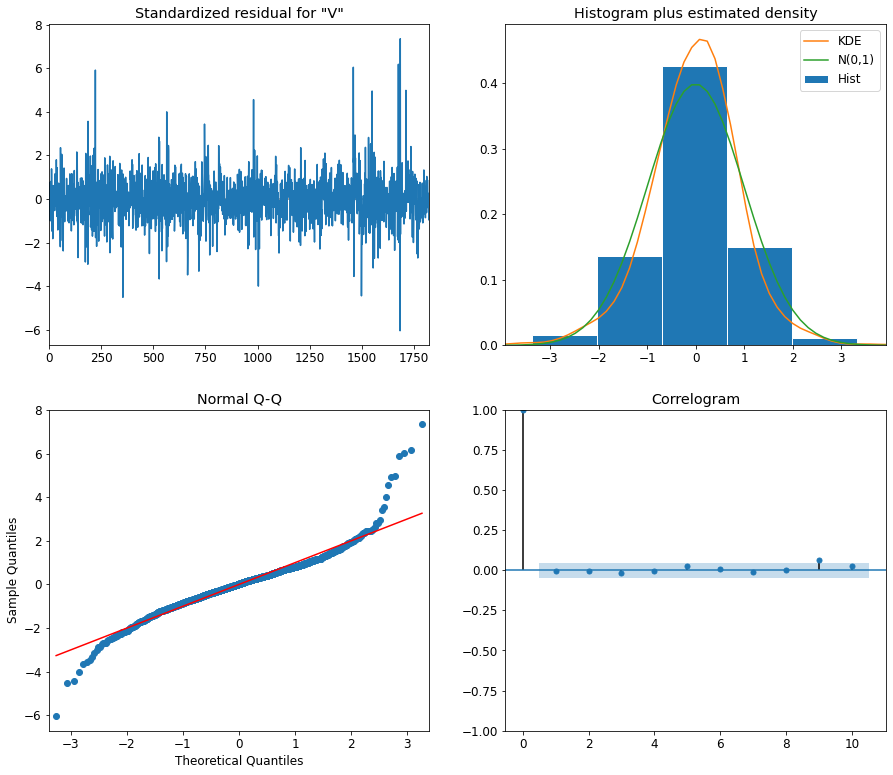

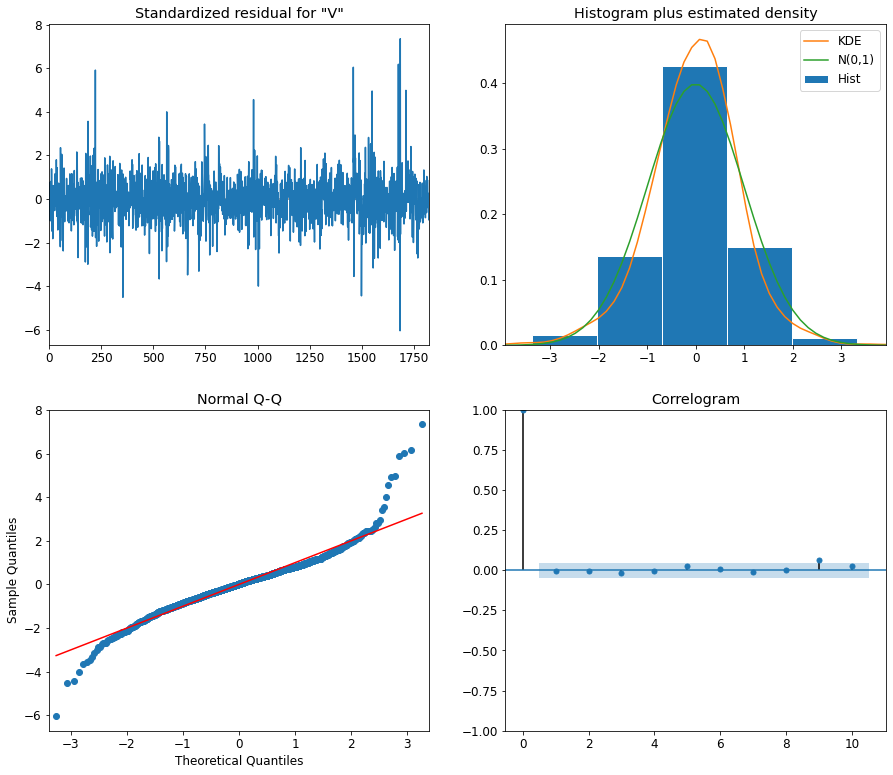

In [114]:
#####Análisis de Residuales######
results_final1 = modelot.fit()
residuales1=results_final1.resid

## Hipótesis nula de no heterocedasticidad
print(results_final1.test_heteroskedasticity(method='breakvar')) #[Est. de prueba, p-valor]
## Hipótesis nula de normalidad
print(results_final1.test_normality(method='jarquebera'))

#1. Estadística de prueba
#2. El p valor
#3. Sesgo estimado de los datos
#4. Curtosis estimada
## Hipótesis nula indica que no se presenta correlación serial
results_final1.plot_diagnostics(figsize=(15,13))
#plt.show()

Como se puede observar en el gráfico de autocorrelación, una correlación no se encuentra bien explicada por el modelo.

#### <font color= 199EDC> <b> Gráficos de sumas acumulativas entrenamiento y validación  </b> </font>

In [ ]:
##Residuales Estandarizados
Res_estand=results_final1.standardized_forecasts_error.reshape(1825,)

1825

Text(0.5, 0, 't')

Text(0, 0.5, 'Cusm')

Text(0.5, 1.0, 'Estadística Cusum')

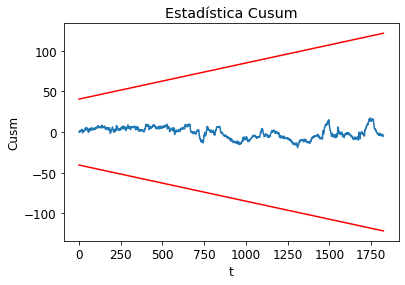

In [ ]:
###Gráfico CUSUM
cum=Res_estand.cumsum()
N=len(Res_estand)
N
Af_cusum=0.948###Cuantil estadística cusum
LS=Af_cusum*math.sqrt(N)+2*Af_cusum*np.arange(1,N+1)/math.sqrt(N)
LI=-LS
plt.plot(cum)
plt.plot(LS,color='red')
plt.plot(LI,color='red')
plt.xlabel("t")
plt.ylabel("Cusm")
plt.title('Estadística Cusum')

Text(0.5, 0, 't')

Text(0, 0.5, 'Cusm')

Text(0.5, 1.0, 'Estadística Cusumsq')

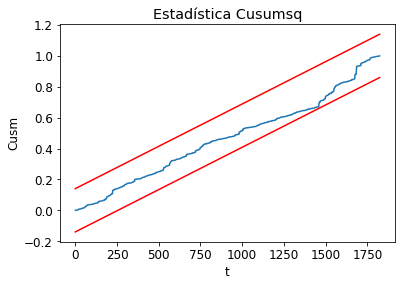

In [ ]:
###Gráfico CUSUM_CUADRADO
cumq=(Res_estand**2).cumsum()/sum(Res_estand**2)
co=0.14013####Valor del cuantil aproximado para cusumsq para n/2
LQS=co+np.arange(1,N+1)/N
LQI=-co+np.arange(1,N+1)/N
plt.plot(cumq)
plt.plot(LQS,color='red')
plt.plot(LQI,color='red')
plt.xlabel("t")
plt.ylabel("Cusm")
plt.title('Estadística Cusumsq')

Como se ve en los gráficos los parámetros parecen ser estables en el tiempo mientras que la varianza del ruido no lo parece.

### <font color= 199EDC> <b> Modelo Redes neuronales multicapa </b> </font>

#### <font color =199EDC> <b> Gráficos de Autocorrelación Serie sin tendencia</b> </font>
Se realiza un gráfico de autocorrelaciones simples y uno de autocorrelaciones parciales para la serie sin tendencia.

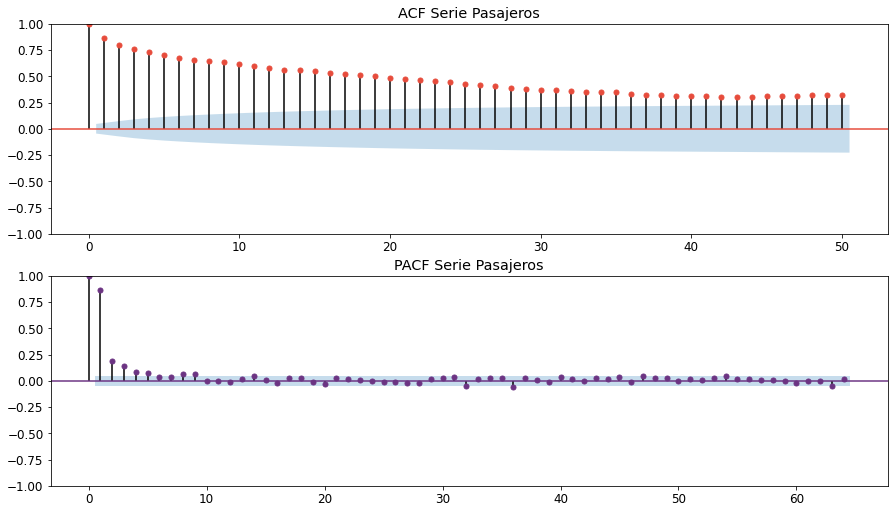

In [ ]:
InteractiveShell.ast_node_interactivity = "last"
fig, axes = plt.subplots(2,1,figsize=(15,8.5)) 
a=plot_acf(Tempst,adjusted=False,lags=50,title='ACF Serie Pasajeros',ax=axes[0], color='#E74C3C')
d=plot_pacf(Tempst,lags=64,title='PACF Serie Pasajeros',ax=axes[1], color = '#6C3483',method="ldbiased")
plt.show()
InteractiveShell.ast_node_interactivity = "all"

En el ACF se puede observar como las correlaciones cercanas a  múltiplos de 12 son significativas, igualmente en el PACF.

#### <font color =199EDC> <b> Variables Rezagadas</b> </font>

In [25]:
df1 = pd.DataFrame()
temdf=pd.DataFrame(Tempst)
temdf.set_axis(['ValorObservado'], axis=1, inplace=True)
mean_train=train_df.mean()
std_train=train_df.std()
temdf=(temdf-mean_train)/std_train
for i in range(30,0,-1):
    df1[['t-'+str(i)]] = temdf.shift(i)
    

In [26]:
# Create column t
df1['t'] = temdf.values

Se eligen 30 retardos.

In [27]:
# Create a new subsetted dataframe, removing Nans from first 130 rows
df1_tem = df1[30:]
print(df1_tem)
df1_tem.size

                t-30      t-29      t-28      t-27      t-26      t-25  \
Fecha                                                                    
2017-01-31 -0.170831  0.005079  0.062987  0.461147  0.025565 -0.037533   
2017-02-01  0.005079  0.062987  0.461147  0.025565 -0.037533  0.396778   
2017-02-02  0.062987  0.461147  0.025565 -0.037533  0.396778  0.429556   
2017-02-03  0.461147  0.025565 -0.037533  0.396778  0.429556 -0.174382   
2017-02-04  0.025565 -0.037533  0.396778  0.429556 -0.174382  0.254193   
...              ...       ...       ...       ...       ...       ...   
2021-12-27 -0.492178 -0.141882 -0.616594 -1.033879 -0.914893 -0.854534   
2021-12-28 -0.141882 -0.616594 -1.033879 -0.914893 -0.854534 -0.733929   
2021-12-29 -0.616594 -1.033879 -0.914893 -0.854534 -0.733929 -1.030915   
2021-12-30 -1.033879 -0.914893 -0.854534 -0.733929 -1.030915 -0.124806   
2021-12-31 -0.914893 -0.854534 -0.733929 -1.030915 -0.124806 -0.480998   

                t-24      t-23      t

55645

#### <font color =199EDC> <b>Ajuste</b> </font>

In [28]:
# Split data

temsplit = df1_tem.values
# split into lagged variables and original time series
X1= temsplit[:, 0:-1]  # slice all rows and start with column 0 and go up to but not including the last column
y1 =temsplit[:,-1]  # slice all rows and last column, essentially separating out 't' column

In [29]:
# Target Train-Test split
Y1 = y1
X_train_full, X_test, y_train_full, y_test=train_test_split(X1,y1,test_size=(183/1795), train_size=(1-(183/1795)),shuffle=False)
X_train, X_val, y_train, y_val=train_test_split(X_train_full,y_train_full,test_size=0.226, train_size=0.774,shuffle=False)

print('Observations for Target: %d' % (len(Y1)))
print('Training Observations for Target: %d' % (len(X_train)))
print('Validation Observations for Target: %d' % (len(X_val)))
print('Testing Observations for Target: %d' % (len(X_test)))

Observations for Target: 1795
Training Observations for Target: 1247
Validation Observations for Target: 365
Testing Observations for Target: 183


In [30]:
model=keras.models.Sequential([keras.layers.Dense(64,activation="relu",input_shape=X_train.shape[1:]),
                               keras.layers.Dense(1)])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss="mean_squared_error",optimizer="adam")
history=model.fit(X_train,y_train,epochs=50,validation_data=(X_val,y_val))

Epoch 1/50
39/39 [==============================] - 1s 5ms/step - loss: 0.5792 - val_loss: 0.6360
Epoch 2/50
39/39 [==============================] - 0s 3ms/step - loss: 0.3704 - val_loss: 0.5295
Epoch 3/50
39/39 [==============================] - 0s 2ms/step - loss: 0.3174 - val_loss: 0.4693
Epoch 4/50
39/39 [==============================] - 0s 2ms/step - loss: 0.2891 - val_loss: 0.4474
Epoch 5/50
39/39 [==============================] - 0s 2ms/step - loss: 0.2714 - val_loss: 0.4392
Epoch 6/50
39/39 [==============================] - 0s 2ms/step - loss: 0.2625 - val_loss: 0.4476
Epoch 7/50
39/39 [==============================] - 0s 3ms/step - loss: 0.2570 - val_loss: 0.4472
Epoch 8/50
39/39 [==============================] - 0s 2ms/step - loss: 0.2563 - val_loss: 0.4017
Epoch 9/50
39/39 [==============================] - 0s 3ms/step - loss: 0.2426 - val_loss: 0.4047
Epoch 10/50
39/39 [==============================] - 0s 2ms/step - loss: 0.2429 - val_loss: 0.3953
Epoch 11/50
39/39 [

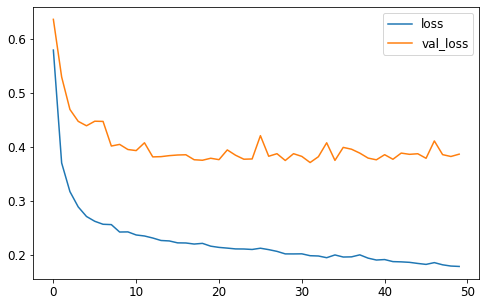

In [32]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [33]:
mse_test=model.evaluate(X_test,y_test)
print(mse_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.5481
0.5481429100036621


#### <font color =199EDC> <b> Hiperparámetros</b> </font>

In [34]:
# This returns a multi-layer-perceptron model in Keras.
def get_keras_model(num_hidden_layers, 
                    num_neurons_per_layer, 
                    dropout_rate, 
                    activation):
    # create the MLP model.
    
    # define the layers.
    inputs = tf.keras.Input(shape=(X_train.shape[1],))  # input layer.
    x = layers.Dropout(dropout_rate)(inputs) # dropout on the weights.
    
    # Add the hidden layers.
    for i in range(num_hidden_layers):
        x = layers.Dense(num_neurons_per_layer, 
                         activation=activation)(x)
        x = layers.Dropout(dropout_rate)(x)
    
    # output layer.
    outputs = layers.Dense(1, activation='linear')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model
    

# This function takes in the hyperparameters and returns a score (Cross validation).
def keras_mlp_cv_score(parameterization, weight=None):
    
    model = get_keras_model(parameterization.get('num_hidden_layers'),
                            parameterization.get('neurons_per_layer'),
                            parameterization.get('dropout_rate'),
                            parameterization.get('activation'))
    
    opt = parameterization.get('optimizer')
    opt = opt.lower()
    
    learning_rate = parameterization.get('learning_rate')
    
    if opt == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif opt == 'rms':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    
    NUM_EPOCHS = 20
    
    # Specify the training configuration.
    model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.MeanSquaredError(),
                  metrics=['mse'])

    data = X_train
    labels = y_train
    
    # fit the model using validation_data=(X_val,y_val) validation set.
    res = model.fit(data, labels, epochs=NUM_EPOCHS, batch_size=parameterization.get('batch_size'),
                    validation_data=(X_val,y_val))
    
    # look at the last 10 epochs. Get the mean and standard deviation of the validation score.
    last10_scores = np.array(res.history['val_loss'][-10:])
    mean = last10_scores.mean()
    sem = last10_scores.std()
    
    # If the model didn't converge then set a high loss.
    if np.isnan(mean):
        return 9999.0, 0.0
    
    return mean, sem

In [ ]:
# Define the search space.
parameters=[
    {
        "name": "learning_rate",
        "type": "range",
        "bounds": [0.001, 0.002],
        "log_scale": True,
    },
    {
        "name": "dropout_rate",
        "type": "range",
        "bounds": [0.01, 0.02],
        "log_scale": True,
    },
    {
        "name": "num_hidden_layers",
        "type": "range",
        "bounds": [1, 2],
        "value_type": "int"
    },
    {
        "name": "neurons_per_layer",
        "type": "range",
        "bounds": [16, 32],
        "value_type": "int"
    },
    {
        "name": "batch_size",
        "type": "choice",
        "values": [10, 20],
    },
    
    {
        "name": "activation",
        "type": "choice",
        "values": ['tanh', 'sigmoid', 'relu'],
    },
    {
        "name": "optimizer",
        "type": "choice",
        "values": ['adam', 'rms'],
    },
]

In [ ]:
from ax.service.ax_client import AxClient
from ax.utils.notebook.plotting import render, init_notebook_plotting

init_notebook_plotting()

ax_client = AxClient()

# create the experiment.
ax_client.create_experiment(
    name="keras_experiment",
    parameters=parameters,
    objective_name='keras_cv',
    minimize=True)

def evaluate(parameters):
    return {"keras_cv": keras_mlp_cv_score(parameters)}


[INFO 12-01 04:26:53] ax.utils.notebook.plotting: Injecting Plotly library into cell. Do not overwrite or delete cell.


[INFO 12-01 04:26:53] ax.service.ax_client: Starting optimization with verbose logging. To disable logging, set the `verbose_logging` argument to `False`. Note that float values in the logs are rounded to 6 decimal points.
[INFO 12-01 04:26:53] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter learning_rate. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 12-01 04:26:53] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter dropout_rate. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 12-01 04:26:53] ax.service.utils.instantiation: Inferred value type of ParameterType.INT for parameter batch_size. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
/usr/loca

In [ ]:
for i in range(10):
    parameters, trial_index = ax_client.get_next_trial()
    ax_client.complete_trial(trial_index=trial_index,raw_data=evaluate(parameters))

[INFO 12-01 04:26:57] ax.service.ax_client: Generated new trial 0 with parameters {'learning_rate': 0.001418, 'dropout_rate': 0.015047, 'num_hidden_layers': 1, 'neurons_per_layer': 23, 'batch_size': 20, 'activation': 'tanh', 'optimizer': 'rms'}.


Epoch 1/20
63/63 [==============================] - 1s 6ms/step - loss: 0.7799 - mse: 0.7799 - val_loss: 0.8263 - val_mse: 0.8263
Epoch 2/20
63/63 [==============================] - 0s 3ms/step - loss: 0.3932 - mse: 0.3932 - val_loss: 0.6015 - val_mse: 0.6015
Epoch 3/20
63/63 [==============================] - 0s 3ms/step - loss: 0.3374 - mse: 0.3374 - val_loss: 0.4935 - val_mse: 0.4935
Epoch 4/20
63/63 [==============================] - 0s 3ms/step - loss: 0.2996 - mse: 0.2996 - val_loss: 0.4604 - val_mse: 0.4604
Epoch 5/20
63/63 [==============================] - 0s 4ms/step - loss: 0.2864 - mse: 0.2864 - val_loss: 0.4466 - val_mse: 0.4466
Epoch 6/20
63/63 [==============================] - 0s 4ms/step - loss: 0.2759 - mse: 0.2759 - val_loss: 0.4323 - val_mse: 0.4323
Epoch 7/20
63/63 [==============================] - 0s 4ms/step - loss: 0.2741 - mse: 0.2741 - val_loss: 0.4285 - val_mse: 0.4285
Epoch 8/20
63/63 [==============================] - 0s 4ms/step - loss: 0.2634 - mse: 0.26

[INFO 12-01 04:27:03] ax.service.ax_client: Completed trial 0 with data: {'keras_cv': (0.433801, 0.039955)}.
[INFO 12-01 04:27:03] ax.service.ax_client: Generated new trial 1 with parameters {'learning_rate': 0.001742, 'dropout_rate': 0.011715, 'num_hidden_layers': 1, 'neurons_per_layer': 18, 'batch_size': 20, 'activation': 'tanh', 'optimizer': 'rms'}.


Epoch 1/20
63/63 [==============================] - 1s 6ms/step - loss: 0.6015 - mse: 0.6015 - val_loss: 0.6848 - val_mse: 0.6848
Epoch 2/20
63/63 [==============================] - 0s 3ms/step - loss: 0.3428 - mse: 0.3428 - val_loss: 0.5317 - val_mse: 0.5317
Epoch 3/20
63/63 [==============================] - 0s 3ms/step - loss: 0.2967 - mse: 0.2967 - val_loss: 0.4881 - val_mse: 0.4881
Epoch 4/20
63/63 [==============================] - 0s 3ms/step - loss: 0.2801 - mse: 0.2801 - val_loss: 0.4639 - val_mse: 0.4639
Epoch 5/20
63/63 [==============================] - 0s 4ms/step - loss: 0.2715 - mse: 0.2715 - val_loss: 0.5100 - val_mse: 0.5100
Epoch 6/20
63/63 [==============================] - 0s 4ms/step - loss: 0.2655 - mse: 0.2655 - val_loss: 0.4795 - val_mse: 0.4795
Epoch 7/20
63/63 [==============================] - 0s 3ms/step - loss: 0.2577 - mse: 0.2577 - val_loss: 0.4561 - val_mse: 0.4561
Epoch 8/20
63/63 [==============================] - 0s 4ms/step - loss: 0.2578 - mse: 0.25

[INFO 12-01 04:27:08] ax.service.ax_client: Completed trial 1 with data: {'keras_cv': (0.458088, 0.015957)}.
[INFO 12-01 04:27:08] ax.service.ax_client: Generated new trial 2 with parameters {'learning_rate': 0.001303, 'dropout_rate': 0.012462, 'num_hidden_layers': 2, 'neurons_per_layer': 16, 'batch_size': 10, 'activation': 'tanh', 'optimizer': 'rms'}.


Epoch 1/20
125/125 [==============================] - 1s 4ms/step - loss: 0.4569 - mse: 0.4569 - val_loss: 0.4897 - val_mse: 0.4897
Epoch 2/20
125/125 [==============================] - 0s 3ms/step - loss: 0.3032 - mse: 0.3032 - val_loss: 0.4674 - val_mse: 0.4674
Epoch 3/20
125/125 [==============================] - 0s 3ms/step - loss: 0.2882 - mse: 0.2882 - val_loss: 0.4438 - val_mse: 0.4438
Epoch 4/20
125/125 [==============================] - 0s 3ms/step - loss: 0.2736 - mse: 0.2736 - val_loss: 0.4341 - val_mse: 0.4341
Epoch 5/20
125/125 [==============================] - 0s 3ms/step - loss: 0.2803 - mse: 0.2803 - val_loss: 0.4316 - val_mse: 0.4316
Epoch 6/20
125/125 [==============================] - 0s 3ms/step - loss: 0.2694 - mse: 0.2694 - val_loss: 0.4307 - val_mse: 0.4307
Epoch 7/20
125/125 [==============================] - 0s 3ms/step - loss: 0.2611 - mse: 0.2611 - val_loss: 0.4303 - val_mse: 0.4303
Epoch 8/20
125/125 [==============================] - 0s 3ms/step - loss: 0.

[INFO 12-01 04:27:19] ax.service.ax_client: Completed trial 2 with data: {'keras_cv': (0.416004, 0.013759)}.
[INFO 12-01 04:27:19] ax.service.ax_client: Generated new trial 3 with parameters {'learning_rate': 0.001243, 'dropout_rate': 0.017088, 'num_hidden_layers': 1, 'neurons_per_layer': 19, 'batch_size': 10, 'activation': 'relu', 'optimizer': 'rms'}.


Epoch 1/20
125/125 [==============================] - 1s 4ms/step - loss: 0.5916 - mse: 0.5916 - val_loss: 0.7726 - val_mse: 0.7726
Epoch 2/20
125/125 [==============================] - 0s 2ms/step - loss: 0.3923 - mse: 0.3923 - val_loss: 0.6250 - val_mse: 0.6250
Epoch 3/20
125/125 [==============================] - 0s 3ms/step - loss: 0.3364 - mse: 0.3364 - val_loss: 0.5403 - val_mse: 0.5403
Epoch 4/20
125/125 [==============================] - 0s 3ms/step - loss: 0.3034 - mse: 0.3034 - val_loss: 0.5552 - val_mse: 0.5552
Epoch 5/20
125/125 [==============================] - 0s 3ms/step - loss: 0.2904 - mse: 0.2904 - val_loss: 0.4697 - val_mse: 0.4697
Epoch 6/20
125/125 [==============================] - 0s 3ms/step - loss: 0.2720 - mse: 0.2720 - val_loss: 0.4618 - val_mse: 0.4618
Epoch 7/20
125/125 [==============================] - 0s 3ms/step - loss: 0.2698 - mse: 0.2698 - val_loss: 0.4345 - val_mse: 0.4345
Epoch 8/20
125/125 [==============================] - 0s 3ms/step - loss: 0.

[INFO 12-01 04:27:27] ax.service.ax_client: Completed trial 3 with data: {'keras_cv': (0.40433, 0.020645)}.
[INFO 12-01 04:27:27] ax.service.ax_client: Generated new trial 4 with parameters {'learning_rate': 0.001153, 'dropout_rate': 0.012288, 'num_hidden_layers': 2, 'neurons_per_layer': 26, 'batch_size': 20, 'activation': 'relu', 'optimizer': 'rms'}.


Epoch 1/20
63/63 [==============================] - 1s 5ms/step - loss: 0.5073 - mse: 0.5073 - val_loss: 0.6521 - val_mse: 0.6521
Epoch 2/20
63/63 [==============================] - 0s 4ms/step - loss: 0.3522 - mse: 0.3522 - val_loss: 0.5074 - val_mse: 0.5074
Epoch 3/20
63/63 [==============================] - 0s 4ms/step - loss: 0.3017 - mse: 0.3017 - val_loss: 0.4664 - val_mse: 0.4664
Epoch 4/20
63/63 [==============================] - 0s 4ms/step - loss: 0.2908 - mse: 0.2908 - val_loss: 0.4669 - val_mse: 0.4669
Epoch 5/20
63/63 [==============================] - 0s 4ms/step - loss: 0.2785 - mse: 0.2785 - val_loss: 0.4411 - val_mse: 0.4411
Epoch 6/20
63/63 [==============================] - 0s 4ms/step - loss: 0.2706 - mse: 0.2706 - val_loss: 0.4338 - val_mse: 0.4338
Epoch 7/20
63/63 [==============================] - 0s 4ms/step - loss: 0.2571 - mse: 0.2571 - val_loss: 0.4263 - val_mse: 0.4263
Epoch 8/20
63/63 [==============================] - 0s 4ms/step - loss: 0.2568 - mse: 0.25

[INFO 12-01 04:27:33] ax.service.ax_client: Completed trial 4 with data: {'keras_cv': (0.419974, 0.015032)}.
[INFO 12-01 04:27:33] ax.service.ax_client: Generated new trial 5 with parameters {'learning_rate': 0.001361, 'dropout_rate': 0.014628, 'num_hidden_layers': 2, 'neurons_per_layer': 28, 'batch_size': 20, 'activation': 'tanh', 'optimizer': 'rms'}.


Epoch 1/20
63/63 [==============================] - 2s 7ms/step - loss: 0.4033 - mse: 0.4033 - val_loss: 0.5216 - val_mse: 0.5216
Epoch 2/20
63/63 [==============================] - 0s 4ms/step - loss: 0.3001 - mse: 0.3001 - val_loss: 0.5084 - val_mse: 0.5084
Epoch 3/20
63/63 [==============================] - 0s 4ms/step - loss: 0.2966 - mse: 0.2966 - val_loss: 0.4375 - val_mse: 0.4375
Epoch 4/20
63/63 [==============================] - 0s 5ms/step - loss: 0.2749 - mse: 0.2749 - val_loss: 0.4353 - val_mse: 0.4353
Epoch 5/20
63/63 [==============================] - 0s 4ms/step - loss: 0.2708 - mse: 0.2708 - val_loss: 0.4412 - val_mse: 0.4412
Epoch 6/20
63/63 [==============================] - 0s 4ms/step - loss: 0.2733 - mse: 0.2733 - val_loss: 0.4131 - val_mse: 0.4131
Epoch 7/20
63/63 [==============================] - 0s 3ms/step - loss: 0.2699 - mse: 0.2699 - val_loss: 0.4411 - val_mse: 0.4411
Epoch 8/20
63/63 [==============================] - 0s 3ms/step - loss: 0.2614 - mse: 0.26

[INFO 12-01 04:27:40] ax.service.ax_client: Completed trial 5 with data: {'keras_cv': (0.432333, 0.012766)}.
[INFO 12-01 04:27:40] ax.service.ax_client: Generated new trial 6 with parameters {'learning_rate': 0.001028, 'dropout_rate': 0.011331, 'num_hidden_layers': 1, 'neurons_per_layer': 19, 'batch_size': 10, 'activation': 'tanh', 'optimizer': 'adam'}.


Epoch 1/20
125/125 [==============================] - 1s 4ms/step - loss: 0.9133 - mse: 0.9133 - val_loss: 0.7620 - val_mse: 0.7620
Epoch 2/20
125/125 [==============================] - 0s 3ms/step - loss: 0.4274 - mse: 0.4274 - val_loss: 0.5506 - val_mse: 0.5506
Epoch 3/20
125/125 [==============================] - 0s 3ms/step - loss: 0.3448 - mse: 0.3448 - val_loss: 0.4689 - val_mse: 0.4689
Epoch 4/20
125/125 [==============================] - 0s 3ms/step - loss: 0.3082 - mse: 0.3082 - val_loss: 0.4460 - val_mse: 0.4460
Epoch 5/20
125/125 [==============================] - 0s 3ms/step - loss: 0.2944 - mse: 0.2944 - val_loss: 0.4336 - val_mse: 0.4336
Epoch 6/20
125/125 [==============================] - 0s 3ms/step - loss: 0.2786 - mse: 0.2786 - val_loss: 0.4232 - val_mse: 0.4232
Epoch 7/20
125/125 [==============================] - 0s 3ms/step - loss: 0.2745 - mse: 0.2745 - val_loss: 0.4108 - val_mse: 0.4108
Epoch 8/20
125/125 [==============================] - 0s 3ms/step - loss: 0.

[INFO 12-01 04:27:51] ax.service.ax_client: Completed trial 6 with data: {'keras_cv': (0.416384, 0.006723)}.
[INFO 12-01 04:27:51] ax.service.ax_client: Generated new trial 7 with parameters {'learning_rate': 0.001332, 'dropout_rate': 0.014737, 'num_hidden_layers': 1, 'neurons_per_layer': 27, 'batch_size': 20, 'activation': 'tanh', 'optimizer': 'adam'}.


Epoch 1/20
63/63 [==============================] - 1s 6ms/step - loss: 0.9961 - mse: 0.9961 - val_loss: 0.6770 - val_mse: 0.6770
Epoch 2/20
63/63 [==============================] - 0s 4ms/step - loss: 0.3951 - mse: 0.3951 - val_loss: 0.5589 - val_mse: 0.5589
Epoch 3/20
63/63 [==============================] - 0s 4ms/step - loss: 0.3436 - mse: 0.3436 - val_loss: 0.4989 - val_mse: 0.4989
Epoch 4/20
63/63 [==============================] - 0s 4ms/step - loss: 0.3140 - mse: 0.3140 - val_loss: 0.4771 - val_mse: 0.4771
Epoch 5/20
63/63 [==============================] - 0s 3ms/step - loss: 0.3029 - mse: 0.3029 - val_loss: 0.4303 - val_mse: 0.4303
Epoch 6/20
63/63 [==============================] - 0s 4ms/step - loss: 0.2793 - mse: 0.2793 - val_loss: 0.4254 - val_mse: 0.4254
Epoch 7/20
63/63 [==============================] - 0s 4ms/step - loss: 0.2796 - mse: 0.2796 - val_loss: 0.4224 - val_mse: 0.4224
Epoch 8/20
63/63 [==============================] - 0s 4ms/step - loss: 0.2740 - mse: 0.27

[INFO 12-01 04:27:57] ax.service.ax_client: Completed trial 7 with data: {'keras_cv': (0.400134, 0.006279)}.
[INFO 12-01 04:27:57] ax.service.ax_client: Generated new trial 8 with parameters {'learning_rate': 0.001821, 'dropout_rate': 0.012773, 'num_hidden_layers': 1, 'neurons_per_layer': 17, 'batch_size': 10, 'activation': 'relu', 'optimizer': 'adam'}.


Epoch 1/20
125/125 [==============================] - 1s 4ms/step - loss: 0.4819 - mse: 0.4819 - val_loss: 0.5140 - val_mse: 0.5140
Epoch 2/20
125/125 [==============================] - 0s 3ms/step - loss: 0.3455 - mse: 0.3455 - val_loss: 0.4375 - val_mse: 0.4375
Epoch 3/20
125/125 [==============================] - 0s 3ms/step - loss: 0.3124 - mse: 0.3124 - val_loss: 0.4171 - val_mse: 0.4171
Epoch 4/20
125/125 [==============================] - 0s 3ms/step - loss: 0.2922 - mse: 0.2922 - val_loss: 0.3998 - val_mse: 0.3998
Epoch 5/20
125/125 [==============================] - 0s 3ms/step - loss: 0.2671 - mse: 0.2671 - val_loss: 0.3979 - val_mse: 0.3979
Epoch 6/20
125/125 [==============================] - 0s 3ms/step - loss: 0.2701 - mse: 0.2701 - val_loss: 0.3930 - val_mse: 0.3930
Epoch 7/20
125/125 [==============================] - 0s 4ms/step - loss: 0.2464 - mse: 0.2464 - val_loss: 0.3779 - val_mse: 0.3779
Epoch 8/20
125/125 [==============================] - 0s 3ms/step - loss: 0.

[INFO 12-01 04:28:05] ax.service.ax_client: Completed trial 8 with data: {'keras_cv': (0.381954, 0.012762)}.
[INFO 12-01 04:28:05] ax.service.ax_client: Generated new trial 9 with parameters {'learning_rate': 0.001546, 'dropout_rate': 0.012763, 'num_hidden_layers': 2, 'neurons_per_layer': 31, 'batch_size': 20, 'activation': 'relu', 'optimizer': 'rms'}.


Epoch 1/20
63/63 [==============================] - 1s 6ms/step - loss: 0.5073 - mse: 0.5073 - val_loss: 0.5818 - val_mse: 0.5818
Epoch 2/20
63/63 [==============================] - 0s 4ms/step - loss: 0.3281 - mse: 0.3281 - val_loss: 0.5127 - val_mse: 0.5127
Epoch 3/20
63/63 [==============================] - 0s 3ms/step - loss: 0.2902 - mse: 0.2902 - val_loss: 0.4695 - val_mse: 0.4695
Epoch 4/20
63/63 [==============================] - 0s 3ms/step - loss: 0.2766 - mse: 0.2766 - val_loss: 0.4699 - val_mse: 0.4699
Epoch 5/20
63/63 [==============================] - 0s 4ms/step - loss: 0.2670 - mse: 0.2670 - val_loss: 0.4536 - val_mse: 0.4536
Epoch 6/20
63/63 [==============================] - 0s 4ms/step - loss: 0.2492 - mse: 0.2492 - val_loss: 0.4754 - val_mse: 0.4754
Epoch 7/20
63/63 [==============================] - 0s 3ms/step - loss: 0.2400 - mse: 0.2400 - val_loss: 0.5539 - val_mse: 0.5539
Epoch 8/20
63/63 [==============================] - 0s 4ms/step - loss: 0.2351 - mse: 0.23

[INFO 12-01 04:28:11] ax.service.ax_client: Completed trial 9 with data: {'keras_cv': (0.430038, 0.017434)}.


In [ ]:
ax_client.get_trials_data_frame().sort_values('trial_index')

keras_cv  trial_index arm_name  learning_rate  dropout_rate  \
0  0.433801            0      0_0       0.001418      0.015047   
1  0.458088            1      1_0       0.001742      0.011715   
2  0.416004            2      2_0       0.001303      0.012462   
3  0.404330            3      3_0       0.001243      0.017088   
4  0.419974            4      4_0       0.001153      0.012288   
5  0.432333            5      5_0       0.001361      0.014628   
6  0.416384            6      6_0       0.001028      0.011331   
7  0.400134            7      7_0       0.001332      0.014737   
8  0.381954            8      8_0       0.001821      0.012773   
9  0.430038            9      9_0       0.001546      0.012763   

   num_hidden_layers  neurons_per_layer  batch_size activation optimizer  \
0                  1                 23          20       tanh       rms   
1                  1                 18          20       tanh       rms   
2                  2                 16          10       tanh       rms   
3                  1                 19          10       relu       rms   
4                  2                 26          20       relu       rms   
5                  2                 28          20       tanh       rms   
6                  1                 19          10       tanh      adam   
7                  1                 27          20       tanh      adam   
8                  1                 17          10       relu      adam   
9                  2                 31          20       relu       rms   

  trial_status generation_method  
0    COMPLETED             Sobol  
1    COMPLETED             Sobol  
2    COMPLETED             Sobol  
3    COMPLETED             Sobol  
4    COMPLETED             Sobol  
5    COMPLETED             Sobol  
6    COMPLETED             Sobol  
7    COMPLETED             Sobol  
8    COMPLETED             Sobol  
9    COMPLETED             Sobol

In [ ]:
best_parameters, values = ax_client.get_best_parameters()

# the best set of parameters.
for k in best_parameters.items():
  print(k)

print()

# the best score achieved.
means, covariances = values
print(means)

('learning_rate', 0.001820978966515505)
('dropout_rate', 0.012773378117516523)
('num_hidden_layers', 1)
('neurons_per_layer', 17)
('batch_size', 10)
('activation', 'relu')
('optimizer', 'adam')

{'keras_cv': 0.38195404410362244}


####<font color= 199EDC> <b>Modelos </b> </font>

In [36]:
model0=keras.models.Sequential([keras.layers.Dense(29,activation="relu",input_shape=X_train.shape[1:],batch_size=10),
                               keras.layers.Dense(1)])

model1=keras.models.Sequential([keras.layers.Dense(28,activation="sigmoid",input_shape=X_train.shape[1:],batch_size=20),
                               keras.layers.Dense(1)])

model2=keras.models.Sequential([keras.layers.Dense(29,activation="sigmoid",input_shape=X_train.shape[1:],batch_size=20),
                               keras.layers.Dense(1)])

model3=keras.models.Sequential([keras.layers.Dense(23,activation="sigmoid",input_shape=X_train.shape[1:],batch_size=20),
                               keras.layers.Dense(1)])

model4=keras.models.Sequential([keras.layers.Dense(17,activation="relu",input_shape=X_train.shape[1:],batch_size=10),
                               keras.layers.Dense(1)])
model.summary(),model1.summary(),model2.summary(),model3.summary(),model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (20, 28)                  868       
                                                                 
 dense_5 (Dense)             (20, 1)                   29        
                                                                 
Total params: 897
Trainable para

(None, None, None, None, None)

In [37]:
model0.compile(loss="mean_squared_error",optimizer="adam")
history=model.fit(X_train,y_train,epochs=50,validation_data=(X_val,y_val))

model1.compile(loss="mean_squared_error",optimizer="rmsprop")
history1=model.fit(X_train,y_train,epochs=50,validation_data=(X_val,y_val))

model2.compile(loss="mean_squared_error",optimizer="rmsprop")
history2=model.fit(X_train,y_train,epochs=50,validation_data=(X_val,y_val))

model3.compile(loss="mean_squared_error",optimizer="adam")
history3=model.fit(X_train,y_train,epochs=50,validation_data=(X_val,y_val))

model4.compile(loss="mean_squared_error",optimizer="adam")
history4=model.fit(X_train,y_train,epochs=50,validation_data=(X_val,y_val))

Epoch 1/50
39/39 [==============================] - 0s 2ms/step - loss: 0.1772 - val_loss: 0.3853
Epoch 2/50
39/39 [==============================] - 0s 2ms/step - loss: 0.1779 - val_loss: 0.4078
Epoch 3/50
39/39 [==============================] - 0s 2ms/step - loss: 0.1731 - val_loss: 0.4028
Epoch 4/50
39/39 [==============================] - 0s 2ms/step - loss: 0.1774 - val_loss: 0.3867
Epoch 5/50
39/39 [==============================] - 0s 2ms/step - loss: 0.1750 - val_loss: 0.3903
Epoch 6/50
39/39 [==============================] - 0s 2ms/step - loss: 0.1743 - val_loss: 0.3882
Epoch 7/50
39/39 [==============================] - 0s 2ms/step - loss: 0.1719 - val_loss: 0.4511
Epoch 8/50
39/39 [==============================] - 0s 3ms/step - loss: 0.1733 - val_loss: 0.3872
Epoch 9/50
39/39 [==============================] - 0s 2ms/step - loss: 0.1691 - val_loss: 0.3867
Epoch 10/50
39/39 [==============================] - 0s 2ms/step - loss: 0.1663 - val_loss: 0.4020
Epoch 11/50
39/39 [

In [38]:
pred2=model0.predict(X_test)
pred2=((pred2*(std_train))+mean_train)[:,0]

pred21=model1.predict(X_test)
pred21=((pred21*(std_train))+mean_train)[:,0]

pred22=model2.predict(X_test)
pred22=((pred22*(std_train))+mean_train)[:,0]

pred23=model3.predict(X_test)
pred23=((pred23*(std_train))+mean_train)[:,0]

pred24=model4.predict(X_test)
pred24=((pred24*(std_train))+mean_train)[:,0]

6/6 [==============================] - 0s 2ms/step


In [39]:
error_multicapa0 = mean_squared_error((y_test*std_train)+mean_train, pred2)
print('ECM: %.3f' % error_multicapa0)

error_multicapa1 = mean_squared_error((y_test*std_train)+mean_train, pred21)
print('ECM: %.3f' % error_multicapa1)

error_multicapa2 = mean_squared_error((y_test*std_train)+mean_train, pred22)
print('ECM: %.3f' % error_multicapa2)

error_multicapa3 = mean_squared_error((y_test*std_train)+mean_train, pred23)
print('ECM: %.3f' % error_multicapa3)

error_multicapa4 = mean_squared_error((y_test*std_train)+mean_train, pred24)
print('ECM: %.3f' % error_multicapa4)

ECM: 4.133
ECM: 13.301
ECM: 3.345
ECM: 4.725
ECM: 4.011


Teniendo en cuenta los ECM de cada modelo, se tiene que el mejor es el modelo 2 con una capa, 29 neuronas por capa y un tamaño de lote de 20. Correspondiente al ECM de 3.345

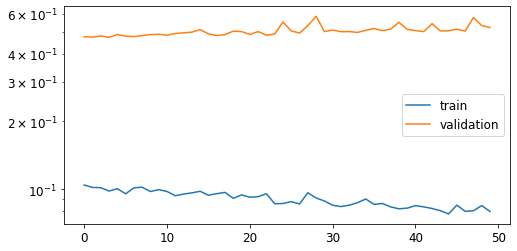

In [41]:
#Plot data
plt.close('all')
plt.figure(figsize=(8,4))
plt.semilogy(history2.history['loss'], label='train')
plt.semilogy(history2.history['val_loss'], label='validation')
plt.legend();

#### <font color= 199EDC> <b> Análisis de Residuales </b> </font>

##### Entrenamiento y validación

In [42]:
residuales21=y_train_full-model2.predict(X_train_full)[:,0]

51/51 [==============================] - 0s 3ms/step


/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



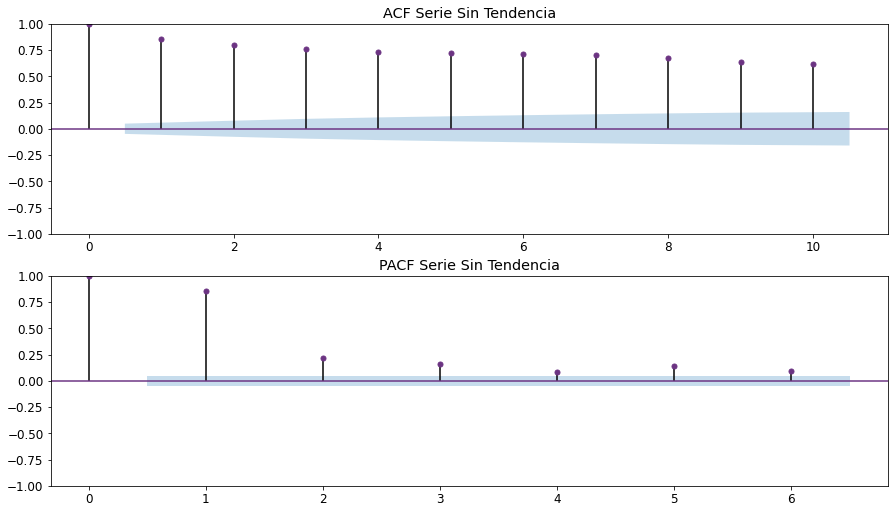

In [43]:
InteractiveShell.ast_node_interactivity = "last"
fig, axes = plt.subplots(2,1,figsize=(15,8.5)) 
b=plot_acf(residuales21,adjusted=False,lags=10,title='ACF Serie Sin Tendencia',ax=axes[0], color='#6C3483')
d=plot_pacf(residuales21,lags=6,title='PACF Serie Sin Tendencia',ax=axes[1], color = '#6C3483')
plt.show()
InteractiveShell.ast_node_interactivity = "all"

Se salen casi todas las correlaciones, tanto parciales como simples.

##### Prueba

In [45]:
residuales2=y_test-model2.predict(X_test)[:,0]

6/6 [==============================] - 0s 2ms/step


/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



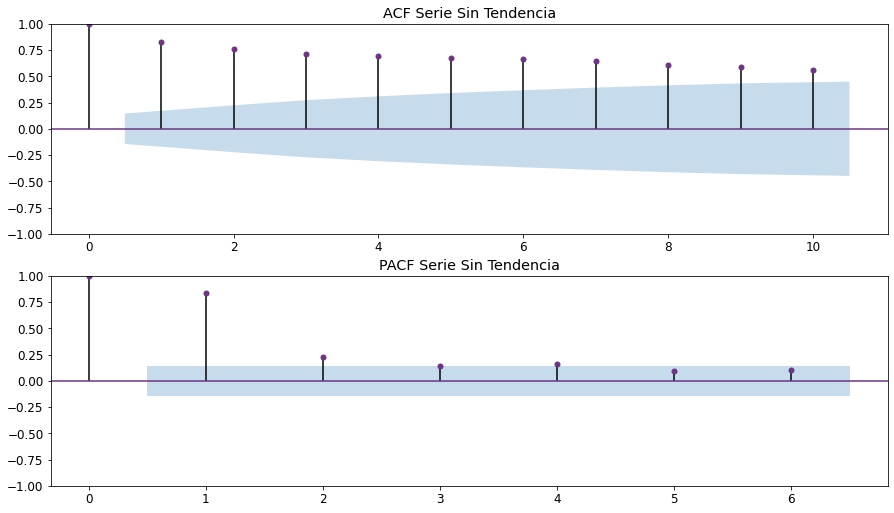

In [46]:
InteractiveShell.ast_node_interactivity = "last"
fig, axes = plt.subplots(2,1,figsize=(15,8.5)) 
b=plot_acf(residuales2,adjusted=False,lags=10,title='ACF Serie Sin Tendencia',ax=axes[0], color='#6C3483')
d=plot_pacf(residuales2,lags=6,title='PACF Serie Sin Tendencia',ax=axes[1], color = '#6C3483')
plt.show()
InteractiveShell.ast_node_interactivity = "all"

Se salen muchas correlaciones.

In [48]:
train_pred_mlp=(model2.predict(X_train)[:,0]*std_train)+mean_train
test_pred_mlp=(model2.predict(X_test)[:,0]*std_train)+mean_train

6/6 [==============================] - 0s 6ms/step


### <font color= 199EDC> <b> Modelo Redes neuronales LSTM </b> </font>

In [53]:
features=['ValorObservado']
pacf = sm.tsa.stattools.pacf(Temp[features], nlags=30)
T = len(Temp[features])

sig_test = lambda tau_h: np.abs(tau_h) > 2.58/np.sqrt(T)
for i in range(len(pacf)):
    if sig_test(pacf[i]) == False:
        n_steps = i - 1
        print('n_steps set to', n_steps)
        break

n_steps set to 5


In [54]:
train_weight = 0.8
split = int(len(Temp) * train_weight)

Tem_train = Temp[features].iloc[:split]
Tem_test = Temp[features].iloc[split:]

In [55]:
mu = float(Tem_train.mean())
sigma = float(Tem_train.std())

stdize_input = lambda x: (x - mu) / sigma

Pas_train = Tem_train.apply(stdize_input)
Pas_test = Tem_test.apply(stdize_input)

In [56]:
n_steps_ahead = 2
def get_lagged_features(df, n_steps, n_steps_ahead):
    """
    df: pandas DataFrame of time series to be lagged
    n_steps: number of lags, i.e. sequence length
    n_steps_ahead: forecasting horizon
    """
    lag_list = []
    
    for lag in range(n_steps + n_steps_ahead - 1, n_steps_ahead - 1, -1):
        lag_list.append(df.shift(lag))
    lag_array = np.dstack([i[n_steps+n_steps_ahead-1:] for i in lag_list])
    # We swap the last two dimensions so each slice along the first dimension
    # is the same shape as the corresponding segment of the input time series 
    lag_array = np.swapaxes(lag_array, 1, -1)
    return lag_array

In [59]:
x_train = get_lagged_features(Tem_train, n_steps, n_steps_ahead)
y_train =  Tem_train.values[n_steps + n_steps_ahead - 1:]
y_train_timestamps = Tem_train.index[n_steps + n_steps_ahead - 1:]

x_test = get_lagged_features(Tem_train, n_steps, n_steps_ahead)
y_test =  Tem_train.values[n_steps + n_steps_ahead - 1:]
y_test_timestamps = Tem_train.index[n_steps + n_steps_ahead - 1:]

In [58]:
def LSTM_(n_units = 64, l1_reg=0.0, seed=0):
  model = keras.models.Sequential()
  model.add(keras.layers.LSTM(n_units, activation='tanh', kernel_initializer=keras.initializers.glorot_uniform(seed), bias_initializer=keras.initializers.glorot_uniform(seed), recurrent_initializer=keras.initializers.orthogonal(seed), kernel_regularizer=keras.regularizers.l1(l1_reg), input_shape=(x_train.shape[1], x_train.shape[-1]), unroll=True)) 
  model.add(keras.layers.Dense(1, kernel_initializer=keras.initializers.glorot_uniform(seed), bias_initializer=keras.initializers.glorot_uniform(seed), kernel_regularizer=keras.regularizers.l1(l1_reg)))
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

In [60]:
max_epochs = 50 #Dejar mil
batch_size = 10

In [61]:
es = keras.callbacks.EarlyStopping(monitor='loss', mode='min', verbose=1, patience=10, min_delta=1e-7, restore_best_weights=True)

In [62]:
params = {
    'lstm': {
        'model': None, 'function': LSTM_,'l1_reg': 0.0, 'H': 10, 
        'color':'red', 'label': 'LSTM'}
}
params

{'lstm': {'model': None,
  'function': <function __main__.LSTM_(n_units=64, l1_reg=0.0, seed=0)>,
  'l1_reg': 0.0,
  'H': 10,
  'color': 'red',
  'label': 'LSTM'}}

In [63]:
do_training = True 
params.keys()

dict_keys(['lstm'])

In [67]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, TimeSeriesSplit, GridSearchCV
import tensorflow as tf

cross_val = True # WARNING: Changing this to True will take many hours to run

if do_training and cross_val:
    n_units = [5, 10, 20]
    l1_reg = [0, 0.001, 0.01, 0.1]
    
    # A dictionary containing a list of values to be iterated through
    # for each parameter of the model included in the search
    param_grid = {'n_units': n_units, 'l1_reg': l1_reg}
    
    # In the kth split, TimeSeriesSplit returns first k folds 
    # as training set and the (k+1)th fold as test set.
    tscv = TimeSeriesSplit(n_splits = 5)
    
    # A grid search is performed for each of the models, and the parameter set which
    # performs best over all the cross-validation splits is saved in the `params` dictionary
    for key in params.keys():
        print('Performing cross-validation. Model:', key)
        model = keras.wrappers.scikit_learn.KerasRegressor(build_fn=params[key]['function'], epochs=max_epochs, 
                               batch_size=batch_size, verbose=2)
        #from scikeras.wrappers import KerasClassifier, KerasRegressor
        grid = GridSearchCV(estimator=model, param_grid=param_grid, 
                            cv=tscv, n_jobs=1, verbose=2)
        grid_result = grid.fit(x_train, y_train, callbacks=[es])
        print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
        
        means = grid_result.cv_results_['mean_test_score']
        stds = grid_result.cv_results_['std_test_score']
        params_ = grid_result.cv_results_['params']
        for mean, stdev, param_ in zip(means, stds, params_):
            print("%f (%f) with %r" % (mean, stdev, param_))
            
        params[key]['H'] = grid_result.best_params_['n_units']
        params[key]['l1_reg']= grid_result.best_params_['l1_reg']

Performing cross-validation. Model: lstm
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Epoch 1/50


<ipython-input-67-9d55593fe86c>:23: DeprecationWarning:

KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



Se han truncado las últimas 5000 líneas del flujo de salida.
Epoch 38: early stopping
25/25 - 0s - loss: 1.5901 - 235ms/epoch - 9ms/step
[CV] END ...............................l1_reg=0, n_units=20; total time=   4.5s
Epoch 1/50
73/73 - 2s - loss: 112.1322 - 2s/epoch - 28ms/step
Epoch 2/50
73/73 - 0s - loss: 42.7563 - 115ms/epoch - 2ms/step
Epoch 3/50
73/73 - 0s - loss: 14.1397 - 117ms/epoch - 2ms/step
Epoch 4/50
73/73 - 0s - loss: 4.2249 - 118ms/epoch - 2ms/step
Epoch 5/50
73/73 - 0s - loss: 1.9810 - 99ms/epoch - 1ms/step
Epoch 6/50
73/73 - 0s - loss: 1.2181 - 92ms/epoch - 1ms/step
Epoch 7/50
73/73 - 0s - loss: 0.9687 - 130ms/epoch - 2ms/step
Epoch 8/50
73/73 - 0s - loss: 0.8981 - 117ms/epoch - 2ms/step
Epoch 9/50
73/73 - 0s - loss: 0.8804 - 95ms/epoch - 1ms/step
Epoch 10/50
73/73 - 0s - loss: 0.8769 - 95ms/epoch - 1ms/step
Epoch 11/50
73/73 - 0s - loss: 0.8760 - 103ms/epoch - 1ms/step
Epoch 12/50
73/73 - 0s - loss: 0.8757 - 109ms/epoch - 1ms/step
Epoch 13/50
73/73 - 0s - loss: 0.8765

In [68]:
if do_training is True:
    for key in params.keys():
        tf.random.set_seed(0)
        print('Training', key, 'model')
        model = params[key]['function'](params[key]['H'], params[key]['l1_reg'])
        model.fit(x_train, y_train, epochs=max_epochs, 
                  batch_size=batch_size, callbacks=[es], shuffle=False)
        params[key]['model'] = model

Training lstm model
Epoch 1/50
146/146 [==============================] - 1s 2ms/step - loss: 91.4267
Epoch 2/50
146/146 [==============================] - 0s 2ms/step - loss: 21.2572
Epoch 3/50
146/146 [==============================] - 0s 3ms/step - loss: 3.8769
Epoch 4/50
146/146 [==============================] - 0s 2ms/step - loss: 2.2659
Epoch 5/50
146/146 [==============================] - 0s 2ms/step - loss: 1.9890
Epoch 6/50
146/146 [==============================] - 0s 2ms/step - loss: 1.9319
Epoch 7/50
146/146 [==============================] - 0s 2ms/step - loss: 1.9147
Epoch 8/50
146/146 [==============================] - 0s 2ms/step - loss: 1.8293
Epoch 9/50
146/146 [==============================] - 0s 2ms/step - loss: 2.3213
Epoch 10/50
146/146 [==============================] - 0s 2ms/step - loss: 1.7370
Epoch 11/50
146/146 [==============================] - 0s 2ms/step - loss: 1.8097
Epoch 12/50
146/146 [==============================] - 0s 2ms/step - loss: 1.7771
Epo

In [69]:
for key in params.keys():
    params[key]['model'].save('temperatura-SAVED-' + key + '.hdf5', overwrite=True) 

In [70]:
if do_training is False:
     for key in params.keys():
        params[key]['model']=keras.models.load_model('temperatura-SAVED-' + key + '.hdf5')

In [71]:
for key in params.keys():
    model = params[key]['model']
    model.summary()
    
    params[key]['pred_train'] = model.predict(x_train, verbose=1)
    params[key]['MSE_train'] = mean_squared_error(y_train, params[key]['pred_train'])
    
    params[key]['pred_test'] = model.predict(x_test, verbose=1) 
    params[key]['MSE_test'] = mean_squared_error(y_test, params[key]['pred_test'])

Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_61 (LSTM)              (None, 20)                1760      
                                                                 
 dense_73 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________
46/46 [==============================] - 0s 1ms/step


In [142]:
train_pred_lstm=(model.predict(x_train, verbose=1)[:,0]*std_train)+mean_train
test_pred_lstm=(model.predict(x_test, verbose=1)[:,0]*std_train)+mean_train
ECM_lstm=mean_squared_error(y_test, test_pred_lstm)
print(ECM_lstm)

46/46 [==============================] - 0s 2ms/step
218.7155146639917


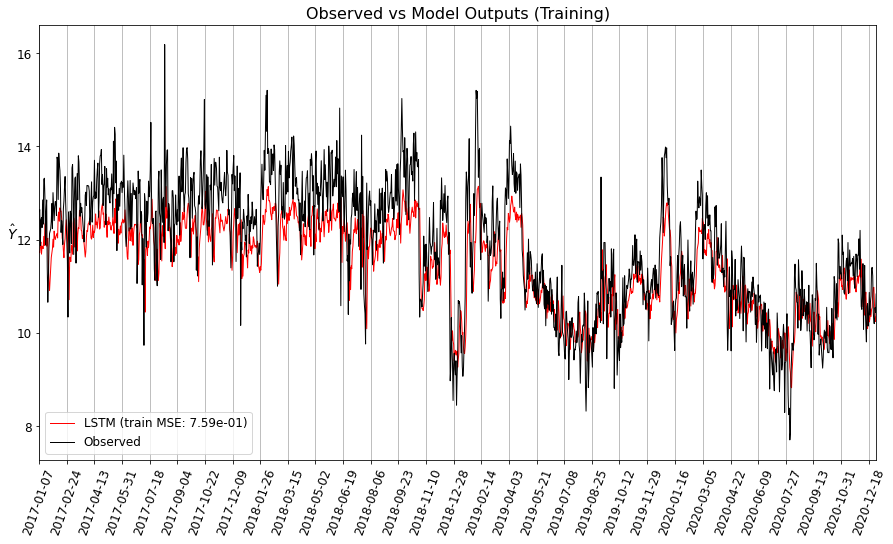

In [73]:
from datetime import datetime
max_pts = 10**4
compare = params.keys() # e.g. ['rnn', 'alpharnn'] or ['lstm']
l, u = (None, None) # lower and upper indices of range to plot 
ds = max(1, len(y_train[l:u])//max_pts) # Downsampling ratio for under `max_pts`
                                        # per series.  Set `None` to disable. 

fig = plt.figure(figsize=(15,8))
x_vals = y_train_timestamps[l:u:ds]
for key in compare:
    y_vals = params[key]['pred_train'][l:u:ds]
    label = params[key]['label'] + ' (train MSE: %.2e)' % params[key]['MSE_train']
    plt.plot(x_vals, y_vals, c=params[key]['color'], label=label, lw=1)
plt.plot(x_vals, y_train[l:u:ds], c="black", label="Observed", lw=1)
start, end = x_vals.min(), x_vals.max()
x_vals=x_vals[::max(1,len(x_vals)//30)]
for t in x_vals: plt.axvline(x=t, c='gray', linewidth=0.5, zorder=0)
plt.xticks(x_vals, rotation=70)
plt.xlim(start, end)
plt.ylabel('$\hat{Y}$', rotation=0, fontsize=14)
plt.legend(loc="best", fontsize=12)
plt.title('Observed vs Model Outputs (Training)', fontsize=16);

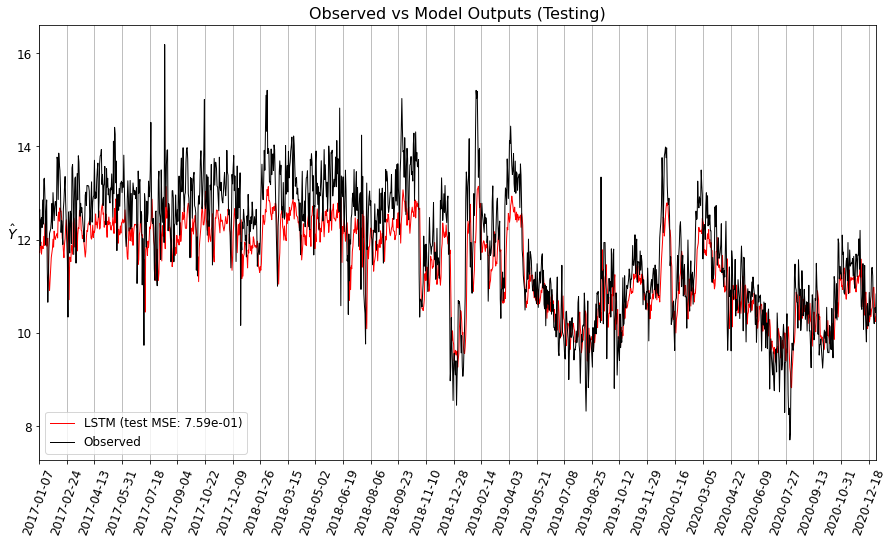

In [74]:
compare = params.keys() # e.g. ['rnn', 'alpharnn'] or ['lstm']
l, u = (None, None) # lower and upper indices of range to plot 
ds = max(1, len(y_train[l:u])//max_pts) # Downsampling ratio for under `max_pts`
                                        # per series.  Set `None` to disable.
fig = plt.figure(figsize=(15,8))
x_vals = y_test_timestamps[l:u:ds]
for key in compare:
    y_vals = params[key]['pred_test'][l:u:ds]
    label = params[key]['label'] + ' (test MSE: %.2e)' % params[key]['MSE_test']
    plt.plot(x_vals, y_vals, c=params[key]['color'], label=label, lw=1)
plt.plot(x_vals, y_test[l:u:ds], c="black", label="Observed", lw=1)
start, end = x_vals.min(), x_vals.max()
x_vals=x_vals[::max(1,len(x_vals)//30)]
for t in x_vals: plt.axvline(x=t, c='gray', linewidth=0.5, zorder=0)
plt.xticks(x_vals, rotation=70)
plt.xlim(start, end)
plt.ylabel('$\hat{Y}$', rotation=0, fontsize=14)
plt.legend(loc="best", fontsize=12)
plt.title('Observed vs Model Outputs (Testing)', fontsize=16);

#### <font color= 199EDC> <b> Análisis de Residuales </b> </font>

##### Entrenamiento

In [77]:
residuales21=x_train[:,0][:,0]-model.predict(x_train)[:,0]

46/46 [==============================] - 0s 1ms/step


/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



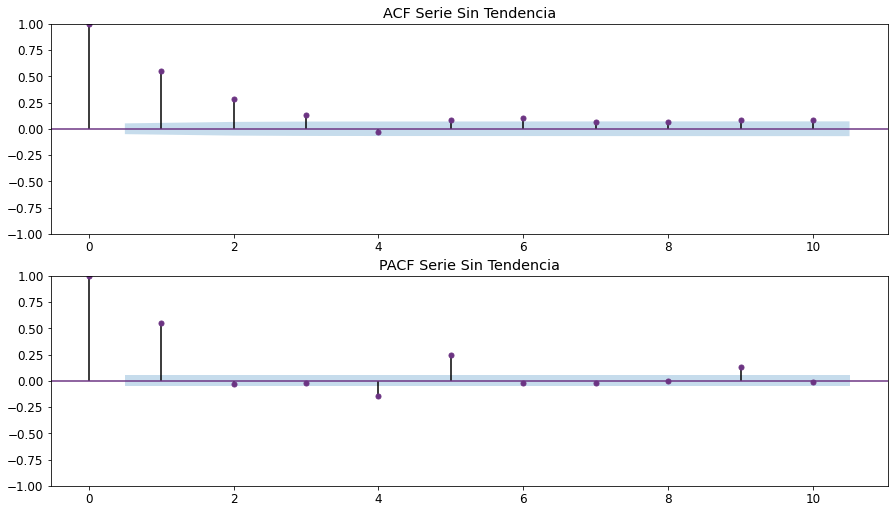

In [78]:
InteractiveShell.ast_node_interactivity = "last"
fig, axes = plt.subplots(2,1,figsize=(15,8.5)) 
b=plot_acf(residuales21,adjusted=False,lags=10,title='ACF Serie Sin Tendencia',ax=axes[0], color='#6C3483')
d=plot_pacf(residuales21,lags=10,title='PACF Serie Sin Tendencia',ax=axes[1], color = '#6C3483')
plt.show()
InteractiveShell.ast_node_interactivity = "all"

Se salen varias de las correlaciones simples y unas pocas parciales.

##### Prueba

In [79]:
residuales2=y_test[:,0]-model.predict(x_test)[:,0]

46/46 [==============================] - 0s 1ms/step


/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



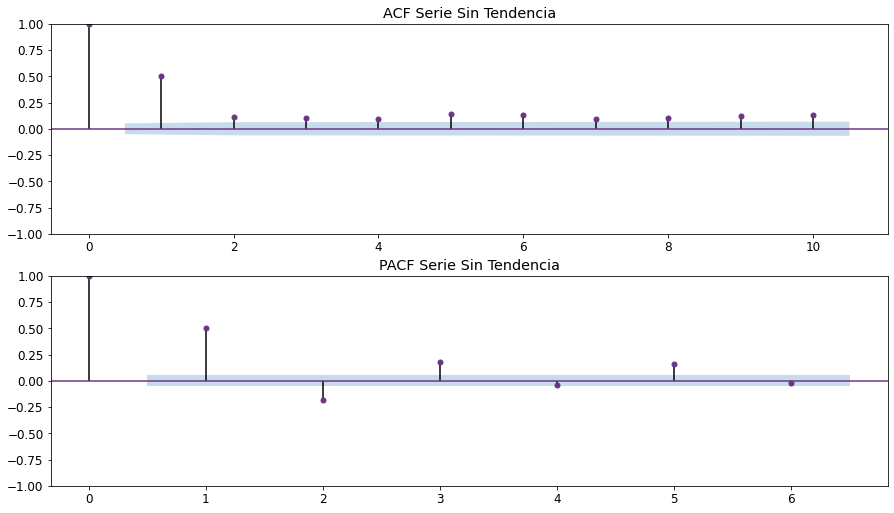

In [80]:
InteractiveShell.ast_node_interactivity = "last"
fig, axes = plt.subplots(2,1,figsize=(15,8.5)) 
b=plot_acf(residuales2,adjusted=False,lags=10,title='ACF Serie Sin Tendencia',ax=axes[0], color='#6C3483')
d=plot_pacf(residuales2,lags=6,title='PACF Serie Sin Tendencia',ax=axes[1], color = '#6C3483')
plt.show()
InteractiveShell.ast_node_interactivity = "all"

Se salen casi todas las autocorrelaciones, tanto en las simples como en las parciales

### <font color= 199EDC> <b> Árboles </b> </font>


Para poder realizar el modelamiento por árboles se quita la tendencia de la serie haciendo uso del suavizamiento exponencial.

In [87]:
df1 = pd.DataFrame()
temdf=pd.DataFrame(Tempst)

In [88]:
df2 = pd.DataFrame()
print(df2)

Empty DataFrame
Columns: []
Index: []


Se eligen 30 retardos.

In [90]:
for i in range(30,0,-1):
  df2[['t-'+str(i)]] = temdf.shift(i)
df2['t'] = temdf.values 
df2_pas = df2[30:]
print(df2_pas.head(30))
df2_pas.shape

                 t-30       t-29       t-28       t-27       t-26       t-25  \
Fecha                                                                          
2017-01-31  11.880556  12.104167  12.177778  12.683908  12.130208  12.050000   
2017-02-01  12.104167  12.177778  12.683908  12.130208  12.050000  12.602083   
2017-02-02  12.177778  12.683908  12.130208  12.050000  12.602083  12.643750   
2017-02-03  12.683908  12.130208  12.050000  12.602083  12.643750  11.876042   
2017-02-04  12.130208  12.050000  12.602083  12.643750  11.876042  12.420833   
2017-02-05  12.050000  12.602083  12.643750  11.876042  12.420833  12.476042   
2017-02-06  12.602083  12.643750  11.876042  12.420833  12.476042  12.259375   
2017-02-07  12.643750  11.876042  12.420833  12.476042  12.259375  12.852083   
2017-02-08  11.876042  12.420833  12.476042  12.259375  12.852083  12.333333   
2017-02-09  12.420833  12.476042  12.259375  12.852083  12.333333  13.291667   
2017-02-10  12.476042  12.259375  12.852

(1795, 31)

In [91]:
# Split data
temsplit = df2_pas.values
# split into lagged variables and original time series
X1 = temsplit[:, 0:-1]  # slice all rows and start with column 0 and go up to but not including the last column
y1 = temsplit[:,-1]  # slice all rows and last column, essentially separating out 't' column

In [92]:
# Target Train-Test split
Y1 = y1
train_target,val_target, test_target = Y1[:912],Y1[912:1277],Y1[1277:]
print('Observations for Target: %d' % (len(Y1)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Validation Observations for Target: %d' % (len(val_target)))
print('Testing Observations for Target: %d' % (len(test_target)))

Observations for Target: 1795
Training Observations for Target: 912
Validation Observations for Target: 365
Testing Observations for Target: 518


In [93]:
# Features Train-Test split

train_feature, val_feature, test_feature = X1[:912],X1[912:1277],X1[1277:] ##Regresoras
print('Observations for feature: %d' % (len(X1)))
print('Training Observations for feature: %d' % (len(train_feature)))
print('Validation Observations for Target: %d' % (len(val_feature)))
print('Testing Observations for feature: %d' % (len(test_feature)))

Observations for feature: 1795
Training Observations for feature: 912
Validation Observations for Target: 365
Testing Observations for feature: 518


In [94]:
# Decision Tree Regresion Model

# Create a decision tree regression model with default arguments
decision_tree_expo = DecisionTreeRegressor()  # max-depth not set
# The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
# Fit the model to the training features(covariables) and targets(respuestas)
decision_tree_expo.fit(train_feature, train_target)

# Check the score on train and test
print("Coeficiente R2 sobre el conjunto de entrenamiento:",decision_tree_expo.score(train_feature, train_target))
print("Coeficiente R2 sobre el conjunto de prueba:",decision_tree_expo.score(test_feature,test_target))  # predictions are horrible if negative value, no relationship if 0
print("el RECM es:",(((decision_tree_expo.predict(test_feature)-test_target)**2).sum())**0.5)

DecisionTreeRegressor()

Coeficiente R2 sobre el conjunto de entrenamiento: 1.0
Coeficiente R2 sobre el conjunto de prueba: 0.5150071347043824
el RECM es: 25.125061758854343


In [95]:
# Find the best Max Depth

# Loop through a few different max depths and check the performance
# Try different max depths. We want to optimize our ML models to make the best predictions possible.
# For regular decision trees, max_depth, which is a hyperparameter, limits the number of splits in a tree.
# You can find the best value of max_depth based on the R-squared score of the model on the test set.

for d in [2, 3, 4, 5,6,7,8,9,10,11]:
    # Create the tree and fit it
    decision_tree_expo = DecisionTreeRegressor(max_depth=d)
    decision_tree_expo.fit(train_feature, train_target)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print("Coeficiente R2 sobre el conjunto de entrenamiento:",decision_tree_expo.score(train_feature, train_target))
    print("Coeficiente R2 sobre el conjunto de prueba:",decision_tree_expo.score(val_feature, val_target), '\n')  # You want the test score to be positive and high
    print("el RECM sobre el conjunto de prueba es:",sklearn.metrics.mean_squared_error(decision_tree_expo.predict(val_feature),val_target, squared=False))

DecisionTreeRegressor(max_depth=2)

max_depth= 2
Coeficiente R2 sobre el conjunto de entrenamiento: 0.6330748197423115
Coeficiente R2 sobre el conjunto de prueba: 0.43806152787415276 

el RECM sobre el conjunto de prueba es: 0.7952507858954182


DecisionTreeRegressor(max_depth=3)

max_depth= 3
Coeficiente R2 sobre el conjunto de entrenamiento: 0.6900802434124529
Coeficiente R2 sobre el conjunto de prueba: 0.5417216939227096 

el RECM sobre el conjunto de prueba es: 0.718165227467769


DecisionTreeRegressor(max_depth=4)

max_depth= 4
Coeficiente R2 sobre el conjunto de entrenamiento: 0.7296717914263529
Coeficiente R2 sobre el conjunto de prueba: 0.41895732175877387 

el RECM sobre el conjunto de prueba es: 0.8086558641820939


DecisionTreeRegressor(max_depth=5)

max_depth= 5
Coeficiente R2 sobre el conjunto de entrenamiento: 0.7803259658322462
Coeficiente R2 sobre el conjunto de prueba: 0.46270711093405625 

el RECM sobre el conjunto de prueba es: 0.7776161473503538


DecisionTreeRegressor(max_depth=6)

max_depth= 6
Coeficiente R2 sobre el conjunto de entrenamiento: 0.8300789815434322
Coeficiente R2 sobre el conjunto de prueba: 0.475793308999939 

el RECM sobre el conjunto de prueba es: 0.7680880419455294


DecisionTreeRegressor(max_depth=7)

max_depth= 7
Coeficiente R2 sobre el conjunto de entrenamiento: 0.8696812691480409
Coeficiente R2 sobre el conjunto de prueba: 0.4407336713252903 

el RECM sobre el conjunto de prueba es: 0.7933577348310763


DecisionTreeRegressor(max_depth=8)

max_depth= 8
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9036488123047783
Coeficiente R2 sobre el conjunto de prueba: 0.4424459945511863 

el RECM sobre el conjunto de prueba es: 0.7921422796624934


DecisionTreeRegressor(max_depth=9)

max_depth= 9
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9308352259305004
Coeficiente R2 sobre el conjunto de prueba: 0.37871905331592837 

el RECM sobre el conjunto de prueba es: 0.8361876351750258


DecisionTreeRegressor(max_depth=10)

max_depth= 10
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9497793484426215
Coeficiente R2 sobre el conjunto de prueba: 0.3298721153978378 

el RECM sobre el conjunto de prueba es: 0.8684375003787572


DecisionTreeRegressor(max_depth=11)

max_depth= 11
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9643249033467655
Coeficiente R2 sobre el conjunto de prueba: 0.39362517699185995 

el RECM sobre el conjunto de prueba es: 0.8260955909415431


Podemos observar como el RECM obtiene el mínimo en d=3

DecisionTreeRegressor(max_depth=3)

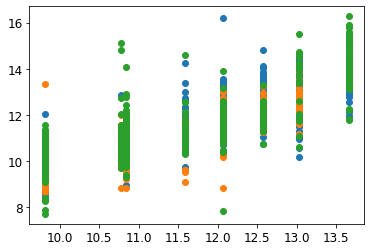

Raíz de la Pérdida cuadrática Entrenamiento: 0.6511435977558381
Raíz de la Pérdida cuadrática Validación: 0.7181652274677691
Raíz de la Pérdida cuadrática Prueba: 0.9012937924164973


In [96]:
from matplotlib import pyplot as plt

# Use the best max_depth 
decision_tree_expo = DecisionTreeRegressor(max_depth=3)  # fill in best max depth here
decision_tree_expo.fit(train_feature, train_target)

# Predict values for train and test
train_prediction = decision_tree_expo.predict(train_feature)
val_prediction = decision_tree_expo.predict(val_feature)
test_prediction = decision_tree_expo.predict(test_feature)


# Scatter the predictions vs actual values
plt.scatter(train_prediction, train_target, label='train')  # blue
plt.scatter(val_prediction, val_target, label='train')  # blue
plt.scatter(test_prediction, test_target, label='test')  # orange
plt.show()
print("Raíz de la Pérdida cuadrática Entrenamiento:",sklearn.metrics.mean_squared_error(train_prediction,train_target,squared=False))
print("Raíz de la Pérdida cuadrática Validación:",sklearn.metrics.mean_squared_error( val_prediction,val_target,squared=False))
print("Raíz de la Pérdida cuadrática Prueba:",sklearn.metrics.mean_squared_error( test_prediction,test_target,squared=False))

In [97]:
from sklearn import tree

listacaract=list(df2_pas.columns.values)
respuesta=listacaract.pop()
text_representation = tree.export_text(decision_tree_expo)
print(text_representation)

|--- feature_29 <= 11.49
|   |--- feature_28 <= 10.68
|   |   |--- feature_29 <= 10.43
|   |   |   |--- value: [9.81]
|   |   |--- feature_29 >  10.43
|   |   |   |--- value: [10.77]
|   |--- feature_28 >  10.68
|   |   |--- feature_8 <= 11.93
|   |   |   |--- value: [10.84]
|   |   |--- feature_8 >  11.93
|   |   |   |--- value: [11.58]
|--- feature_29 >  11.49
|   |--- feature_29 <= 12.66
|   |   |--- feature_29 <= 12.15
|   |   |   |--- value: [12.07]
|   |   |--- feature_29 >  12.15
|   |   |   |--- value: [12.58]
|   |--- feature_29 >  12.66
|   |   |--- feature_29 <= 13.75
|   |   |   |--- value: [13.03]
|   |   |--- feature_29 >  13.75
|   |   |   |--- value: [13.66]



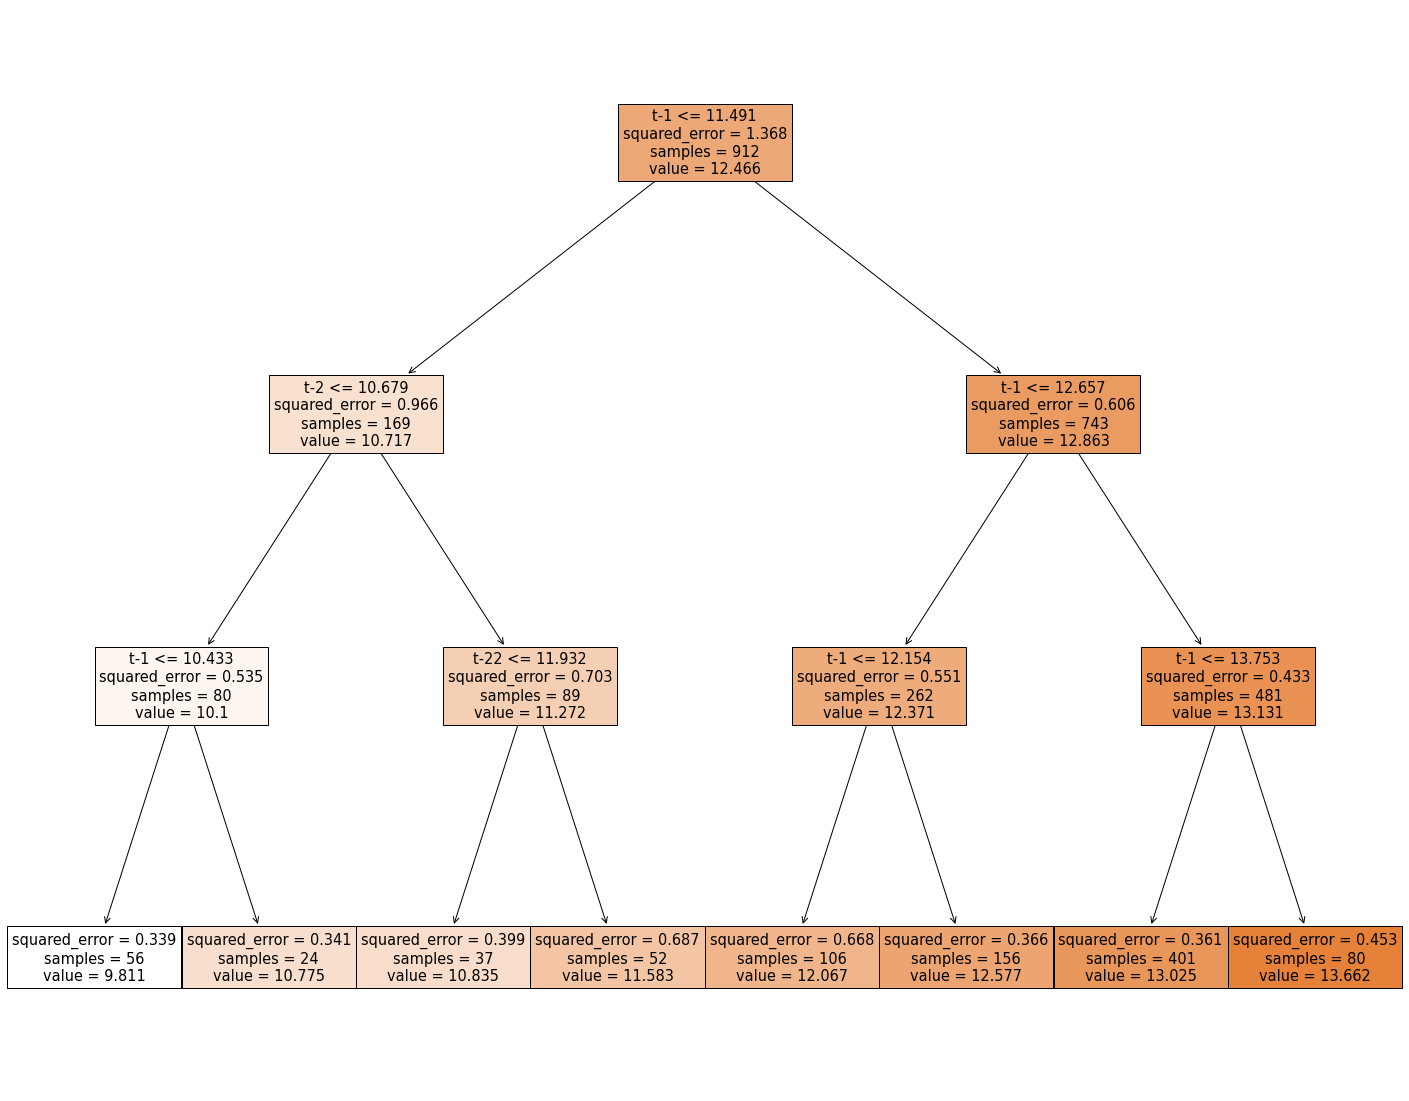

In [98]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree_expo, 
                   feature_names=listacaract,  
                   class_names=respuesta,
                   filled=True)

In [99]:
print(train_prediction.size)
print(train_target.size)

print(val_prediction.size)
print(val_target.size)


print(test_prediction.size)
print(test_target.size)

912
912
365
365
518
518


In [100]:
indicetrian_test=df2_pas.index
indicetrain=indicetrian_test[:912]
indiceval=indicetrian_test[912:1277]
indicetest=indicetrian_test[1277:]

In [101]:
print(indicetrain.size)
print(indiceval.size)
print(indicetest.size)

912
365
518


In [102]:
targetjoint=np.concatenate((train_target, val_target,test_target ))
predictionjoint=np.concatenate((train_prediction,val_prediction,test_prediction))
print(targetjoint.size)
print(predictionjoint.size)

1795
1795


In [103]:
d = {'observado': targetjoint, 'Predicción': predictionjoint}
ObsvsPred=pd.DataFrame(data=d,index=indicetrian_test)
ObsvsPred.head(10)

observado  Predicción
Fecha                            
2017-01-31  13.009375   12.577084
2017-02-01  12.677083   13.025416
2017-02-02  12.408333   13.025416
2017-02-03  12.714583   12.577084
2017-02-04  12.817708   13.025416
2017-02-05  12.760417   13.025416
2017-02-06  12.516667   13.025416
2017-02-07  13.769792   12.577084
2017-02-08  13.720833   13.662117
2017-02-09  12.861458   13.025416

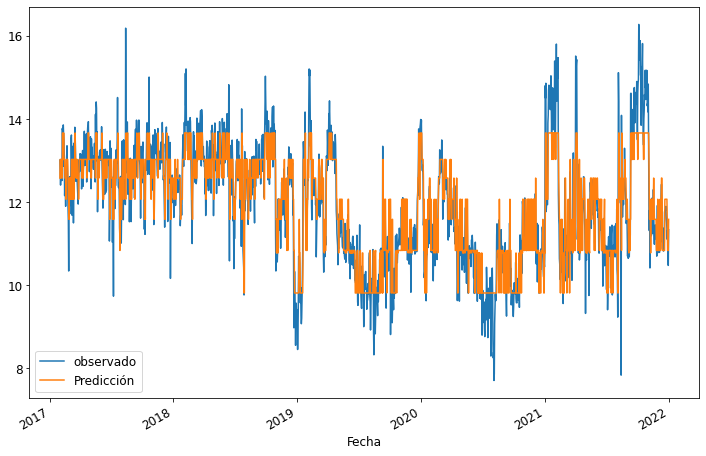

In [104]:
ax = ObsvsPred.plot(figsize=(12,8))

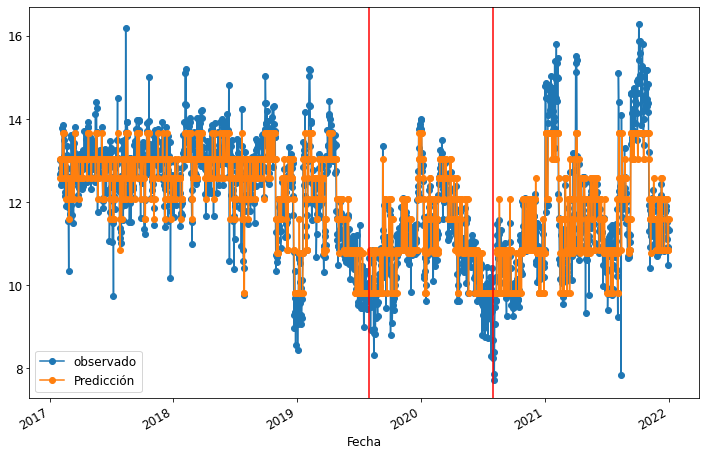

In [105]:
ax = ObsvsPred.plot( marker="o", figsize=(12,8))
ax.axvline(x=indicetrian_test[912].date(),color='red')
ax.axvline(x=indicetrian_test[1277].date(),color='red')

#### <font color= 199EDC> <b> Análisis de Residuales </b> </font>

#### <font color= 199EDC> <b> ACF y PACF  </b> </font>

In [106]:
residualessss=test_target-test_prediction

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



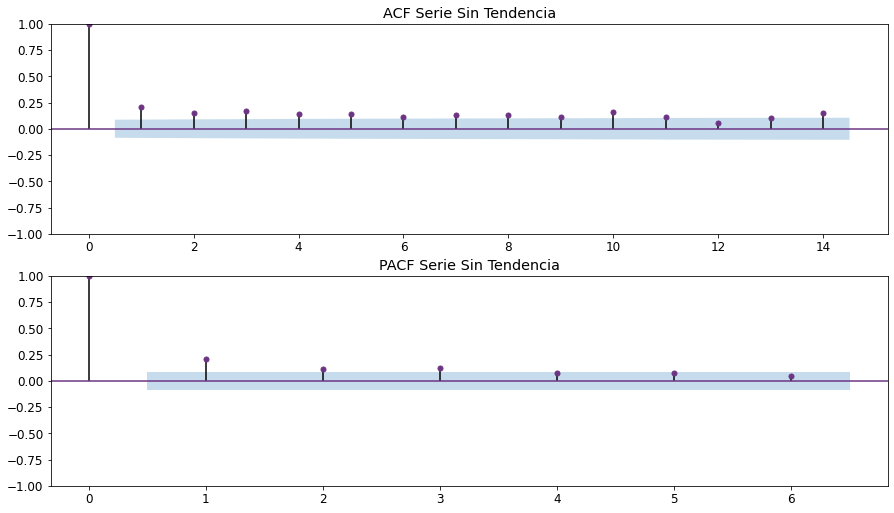

In [107]:
InteractiveShell.ast_node_interactivity = "last"
fig, axes = plt.subplots(2,1,figsize=(15,8.5)) 
b=plot_acf(residualessss,adjusted=False,lags=14,title='ACF Serie Sin Tendencia',ax=axes[0], color='#6C3483')
d=plot_pacf(residualessss,lags=6,title='PACF Serie Sin Tendencia',ax=axes[1], color = '#6C3483')
plt.show()
InteractiveShell.ast_node_interactivity = "all"

Se puede observar como todos los valores del ACF y PACF estan bien explicados.

In [108]:
errorAR =sklearn.metrics.mean_squared_error( test_prediction,test_target,squared=False)
print("RECM Árboles:",errorAR)

RECM Árboles: 0.9012937924164973


### <font color= 199EDC> <b> Comparación de modelos </b> </font>

In [111]:
print("RECM ARIMA con componentes de Fourier:",error4**.5)
print('RECM Redes Multicapa:', error_multicapa3**.5)
print("RECM LSTM:",ECM_lstm**.5)
print('RECM Arboles:', errorAR**.5)

RECM ARIMA con componentes de Fourier: 2.619348698211086
RECM Redes Multicapa: 2.17376620720163
RECM LSTM: 14.789033594660326
RECM Arboles: 0.949364941640725


In [131]:
len(test_pred_lstm)

1454

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



<Figure size 864x864 with 0 Axes>

Text(0.5, 1.0, 'Actual vs Predicted ')

Text(0, 0.5, 'Temperatura')

Text(0.5, 0, 'Index')

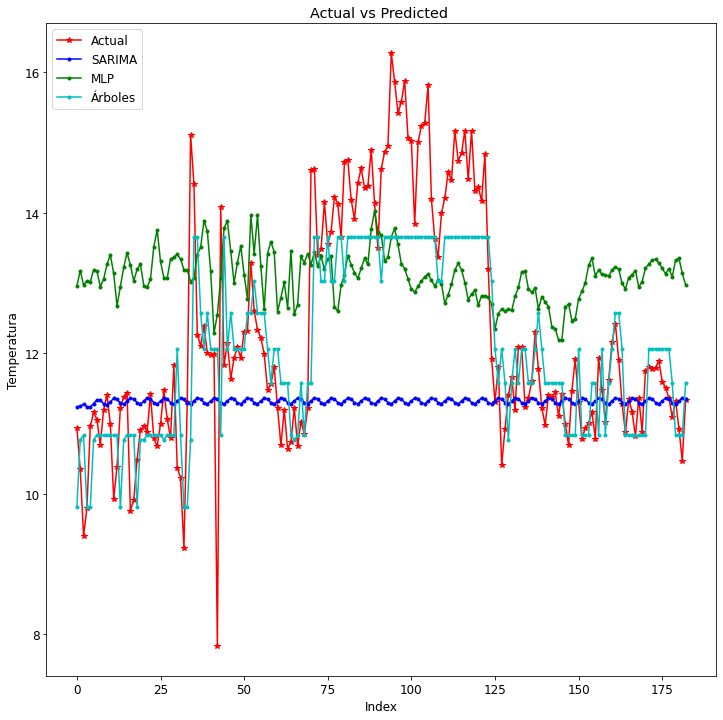

In [144]:
pronosticos=results_final1.forecast(steps=183, exog=xreg[1642:])
ar_Pred=ObsvsPred['Predicción'][1612:]
plt.figure(figsize=(12, 12))
plt.plot(range(183), test_df.values, linestyle='-', marker='*', color='r')
plt.plot(range(183), pronosticos, linestyle='-', marker='.', color='b')  
plt.plot(range(183), test_pred_mlp, linestyle='-', marker='.', color='g')  
plt.plot(range(183), ar_Pred, linestyle='-', marker='.', color='c')  
plt.legend(['Actual','SARIMA','MLP','Árboles'], loc=2)
plt.title('Actual vs Predicted ')
plt.ylabel('Temperatura')
plt.xlabel('Index')